# Yad2 Car Price - 
### Visualization, Inference and Prediction

_Importing Modules:_

In [1]:
import pandas as pd
import time
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib as mb
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from folium.plugins import HeatMap
from branca.element import Figure

_Appending dataframes from crawling session:_

In [2]:

df = pd.read_csv("Yad2crawler0.csv")
for i in range(1,25):
    try:
        datastr = "Yad2Crawler" + (str(i)) + ".csv"

        newdf = pd.read_csv(datastr)
        df = df.append(newdf)
        print(datastr)

    except:
        continue
        
df

Yad2Crawler1.csv
Yad2Crawler2.csv
Yad2Crawler3.csv
Yad2Crawler7.csv
Yad2Crawler9.csv
Yad2Crawler10.csv
Yad2Crawler12.csv
Yad2Crawler13.csv
Yad2Crawler15.csv
Yad2Crawler16.csv
Yad2Crawler21.csv


C:\Users\Ayal\AppData\Local\Temp\ipykernel_26256\4145957310.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdf)
C:\Users\Ayal\AppData\Local\Temp\ipykernel_26256\4145957310.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdf)
C:\Users\Ayal\AppData\Local\Temp\ipykernel_26256\4145957310.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdf)
C:\Users\Ayal\AppData\Local\Temp\ipykernel_26256\4145957310.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newdf)
C:\Users\Ayal\AppData\Local\Temp\ipykernel_26256\4145957310.py:7: FutureWarning: The frame.append method is 

Unnamed: 0 אזור המכירה: בעלות נוכחית בעלות קודמת  זיהום מירבי   טסט עד  \
0             0      תימורים        פרטית       פרטית         15.0  10/2022   
1             1   קרית מלאכי        פרטית         NaN          3.0  06/2022   
2             2     כפר מנדא        פרטית         NaN         15.0  01/2022   
3             3        נתניה        פרטית       פרטית         15.0  10/2022   
4             4     כפר תבור        פרטית       פרטית         15.0  06/2022   
..          ...          ...          ...         ...          ...      ...   
365         365       אשקלון       ליסינג         NaN          6.0  12/2022   
366         366         חדרה        פרטית       פרטית          NaN  11/2022   
367         367          לוד        פרטית      ליסינג         14.0  05/2022   
368         368        נתניה        פרטית       פרטית          NaN      NaN   
369         369      ירושלים        פרטית       פרטית         14.0  12/2023   

     יד מוכן להחלפה מותאם לנכים                         סוג  \
0     3          לא          לא                   ב.מ.וו X3   
1     1          לא          לא                   מרצדס GLE   
2     1          לא          לא              שברולט טראוורס   
3     2          לא          לא          אלפא רומיאו סטלויו   
4     3          לא          לא  לנד רובר ריינג' רובר איווק   
..   ..         ...         ...                         ...   
365   1          כן          לא                 סקודה ראפיד   
366   4          לא          לא                 פיג'ו 307CC   
367   3          לא          לא                  אופל אסטרה   
368   3          לא          לא      יונדאי אקסנט (עד 2012)   
369   2          לא          לא                  פורד פוקוס   

                 סוג מנוע    סמ״ק        צבע קילומטראז'     שנה  \
0                   בנזין  1997.0  לבן פנינה     48,000  2017.0   
1    היברידי חשמל / בנזין  2996.0        לבן     85,000  2018.0   
2                   בנזין  3564.0       שחור     79,823  2017.0   
3                   בנזין  1995.0        לבן     27,000  2018.0   
4                   בנזין  1999.0        לבן    100,000  2015.0   
..                    ...     ...        ...        ...     ...   
365                 בנזין  1395.0        לבן    220,000  2017.0   
366                 בנזין  1997.0       שחור    210,000  2005.0   
367                 בנזין  1399.0   כסף מטלי    113,000  2016.0   
368                 בנזין  1495.0        לבן    300,000  2005.0   
369                 בנזין  1596.0        לבן    147,500  2012.0   

    תאריך עליה לכביש תיבת הילוכים שם הסוכנות:      מחיר  
0            10/2017       אוטומט         NaN       NaN  
1            06/2018       אוטומט         NaN       NaN  
2            01/2017       אוטומט         NaN       NaN  
3            10/2018       אוטומט         NaN       NaN  
4            06/2015       אוטומט         NaN       NaN  
..               ...          ...         ...       ...  
365          02/2017       אוטומט         NaN  45,000 ₪  
366              NaN    טיפטרוניק         NaN  28,000 ₪  
367          05/2016       אוטומט         NaN  40,000 ₪  
368              NaN       אוטומט         NaN   3,000 ₪  
369          11/2012       אוטומט         NaN  19,800 ₪  

[14894 rows x 19 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14894 entries, 0 to 369
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14894 non-null  int64  
 1   אזור המכירה:      14894 non-null  object 
 2   בעלות נוכחית      14894 non-null  object 
 3   בעלות קודמת       9183 non-null   object 
 4   זיהום מירבי       13655 non-null  float64
 5   טסט עד            12548 non-null  object 
 6   יד                14894 non-null  int64  
 7   מוכן להחלפה       14894 non-null  object 
 8   מותאם לנכים       14894 non-null  object 
 9   סוג               14894 non-null  object 
 10  סוג מנוע          14894 non-null  object 
 11  סמ״ק              14554 non-null  float64
 12  צבע               14830 non-null  object 
 13  קילומטראז'        13944 non-null  object 
 14  שנה               14893 non-null  float64
 15  תאריך עליה לכביש  12575 non-null  object 
 16  תיבת הילוכים      14894 non-null  object 


_Dropping duplicate rows and rental ads, cleaning data, enhancing aesthetics, etc. :_

In [4]:
df.duplicated().sum()

7177

In [5]:
df.groupby(df.columns.tolist(),as_index=False).size()


Unnamed: 0            אזור המכירה: בעלות נוכחית בעלות קודמת  \
0             18                    נצרת        פרטית  ייבוא אישי   
1             18  נצרת עילית / נוף הגליל        פרטית       פרטית   
2             19                    חיפה        פרטית      ליסינג   
3             20                   נתניה        פרטית      ליסינג   
4             20                   עפולה        פרטית       פרטית   
...          ...                     ...          ...         ...   
1041        4162                   חולון        פרטית       פרטית   
1042        4185               פתח תקווה        פרטית       פרטית   
1043        4189                    חיפה        פרטית        חברה   
1044        4197                   חולון        פרטית       פרטית   
1045        4199                   נתניה        פרטית        חברה   

      זיהום מירבי   טסט עד  יד מוכן להחלפה מותאם לנכים                   סוג  \
0            15.0  01/2022   2          כן          לא         שברולט קאמארו   
1            14.0  05/2022   2          לא          לא             פיג'ו 508   
2            11.0  06/2022   2          כן          לא               מאזדה 3   
3            14.0  10/2022   2          לא          לא            פורד פוקוס   
4             5.0  06/2022   2          כן          לא           סיאט איביזה   
...           ...      ...  ..         ...         ...                   ...   
1041         14.0  04/2022   2          כן          לא         אינפיניטי Q50   
1042         11.0  03/2022   3          כן          לא      פיאט קובו / QUBO   
1043          3.0  12/2021   2          כן          לא  יונדאי סונטה הייבריד   
1044         14.0  01/2022   2          כן          לא              אאודי A4   
1045          9.0  04/2022   2          לא          לא          סוזוקי ספלאש   

     סוג מנוע    סמ״ק         צבע קילומטראז'     שנה תאריך עליה לכביש  \
0       בנזין  3600.0        אדום     65,000  2017.0          01/2017   
1       בנזין  1598.0  כסוף מטאלי    150,000  2013.0          06/2013   
2       בנזין  1496.0        כסוף    150,000  2014.0          07/2014   
3       בנזין  1596.0  שחור מטאלי    148,000  2012.0          10/2012   
4       בנזין   999.0  שחור מטאלי     70,000  2017.0          06/2017   
...       ...     ...         ...        ...     ...              ...   
1041    בנזין  1991.0   לבן פנינה    100,000  2015.0          04/2015   
1042    בנזין  1368.0         לבן    145,000  2016.0          03/2016   
1043    בנזין  1999.0         לבן    150,000  2017.0          01/2017   
1044    בנזין  1984.0   לבן מטאלי    125,000  2018.0          01/2018   
1045    בנזין  1242.0         לבן    153,000  2015.0          04/2015   

     תיבת הילוכים            שם הסוכנות:          מחיר  size  
0          אוטומט           Waked motors     245,000 ₪     1  
1          אוטומט               רכב עבוד      20,000 ₪     1  
2          אוטומט               נקסט קאר      50,000 ₪     1  
3          אוטומט       סנטר קאר סוכניות      18,900 ₪     1  
4          אוטומט                עדן קאר   899 ₪ לחודש     1  
...           ...                    ...           ...   ...  
1041       אוטומט              RS MOTORS  1850 ₪ לחודש     1  
1042        ידנית  טרייד אין רומקאר בע"מ      26,900 ₪     1  
1043       אוטומט               אוטוסייל      84,990 ₪     1  
1044       אוטומט            פרימיום קאר     175,000 ₪     1  
1045       אוטומט    מכון בדיקה אוטו טסט      34,900 ₪     1  

[1046 rows x 20 columns]

In [6]:
no_dups = df.drop_duplicates()
no_dups

Unnamed: 0 אזור המכירה: בעלות נוכחית בעלות קודמת  זיהום מירבי   טסט עד  \
0             0      תימורים        פרטית       פרטית         15.0  10/2022   
1             1   קרית מלאכי        פרטית         NaN          3.0  06/2022   
2             2     כפר מנדא        פרטית         NaN         15.0  01/2022   
3             3        נתניה        פרטית       פרטית         15.0  10/2022   
4             4     כפר תבור        פרטית       פרטית         15.0  06/2022   
..          ...          ...          ...         ...          ...      ...   
365         365       אשקלון       ליסינג         NaN          6.0  12/2022   
366         366         חדרה        פרטית       פרטית          NaN  11/2022   
367         367          לוד        פרטית      ליסינג         14.0  05/2022   
368         368        נתניה        פרטית       פרטית          NaN      NaN   
369         369      ירושלים        פרטית       פרטית         14.0  12/2023   

     יד מוכן להחלפה מותאם לנכים                         סוג  \
0     3          לא          לא                   ב.מ.וו X3   
1     1          לא          לא                   מרצדס GLE   
2     1          לא          לא              שברולט טראוורס   
3     2          לא          לא          אלפא רומיאו סטלויו   
4     3          לא          לא  לנד רובר ריינג' רובר איווק   
..   ..         ...         ...                         ...   
365   1          כן          לא                 סקודה ראפיד   
366   4          לא          לא                 פיג'ו 307CC   
367   3          לא          לא                  אופל אסטרה   
368   3          לא          לא      יונדאי אקסנט (עד 2012)   
369   2          לא          לא                  פורד פוקוס   

                 סוג מנוע    סמ״ק        צבע קילומטראז'     שנה  \
0                   בנזין  1997.0  לבן פנינה     48,000  2017.0   
1    היברידי חשמל / בנזין  2996.0        לבן     85,000  2018.0   
2                   בנזין  3564.0       שחור     79,823  2017.0   
3                   בנזין  1995.0        לבן     27,000  2018.0   
4                   בנזין  1999.0        לבן    100,000  2015.0   
..                    ...     ...        ...        ...     ...   
365                 בנזין  1395.0        לבן    220,000  2017.0   
366                 בנזין  1997.0       שחור    210,000  2005.0   
367                 בנזין  1399.0   כסף מטלי    113,000  2016.0   
368                 בנזין  1495.0        לבן    300,000  2005.0   
369                 בנזין  1596.0        לבן    147,500  2012.0   

    תאריך עליה לכביש תיבת הילוכים שם הסוכנות:      מחיר  
0            10/2017       אוטומט         NaN       NaN  
1            06/2018       אוטומט         NaN       NaN  
2            01/2017       אוטומט         NaN       NaN  
3            10/2018       אוטומט         NaN       NaN  
4            06/2015       אוטומט         NaN       NaN  
..               ...          ...         ...       ...  
365          02/2017       אוטומט         NaN  45,000 ₪  
366              NaN    טיפטרוניק         NaN  28,000 ₪  
367          05/2016       אוטומט         NaN  40,000 ₪  
368              NaN       אוטומט         NaN   3,000 ₪  
369          11/2012       אוטומט         NaN  19,800 ₪  

[7717 rows x 19 columns]

In [168]:
no_dups.duplicated().sum()

0

In [169]:
df1 = no_dups
df1.nunique() 

Unnamed: 0          4201
אזור המכירה:         404
בעלות נוכחית           8
בעלות קודמת            8
זיהום מירבי           15
טסט עד                43
יד                    11
מוכן להחלפה            2
מותאם לנכים            2
סוג                  470
סוג מנוע               6
סמ״ק                 209
צבע                   50
קילומטראז'           821
שנה                   35
תאריך עליה לכביש     249
תיבת הילוכים           7
שם הסוכנות:          518
מחיר                 865
dtype: int64

_changing column names to Hebrew for convenience sake:_

In [170]:
name_dict = {
    'אזור המכירה:' : 'Area',
    'בעלות נוכחית' : 'Owner',
    'זיהום מירבי' : 'AirPol',
    'יד' : 'Hand',
    'מוכן להחלפה' : 'Trade',
    'סוג' : 'Type',
    'סוג מנוע' : 'Engine',
    'סמ״ק' : 'Volume',
    'צבע' : 'Color',
    "קילומטראז'" : 'Km',
    'שנה' : 'Year',
    'תיבת הילוכים' : 'Gear',
    'מחיר' : 'Price',
    'מותאם לנכים' : 'Handicap'
}
eng_df = df1.rename(columns=name_dict)
eng_df

Unnamed: 0        Area   Owner בעלות קודמת  AirPol   טסט עד  Hand Trade  \
0             0     תימורים   פרטית       פרטית    15.0  10/2022     3    לא   
1             1  קרית מלאכי   פרטית         NaN     3.0  06/2022     1    לא   
2             2    כפר מנדא   פרטית         NaN    15.0  01/2022     1    לא   
3             3       נתניה   פרטית       פרטית    15.0  10/2022     2    לא   
4             4    כפר תבור   פרטית       פרטית    15.0  06/2022     3    לא   
..          ...         ...     ...         ...     ...      ...   ...   ...   
365         365      אשקלון  ליסינג         NaN     6.0  12/2022     1    כן   
366         366        חדרה   פרטית       פרטית     NaN  11/2022     4    לא   
367         367         לוד   פרטית      ליסינג    14.0  05/2022     3    לא   
368         368       נתניה   פרטית       פרטית     NaN      NaN     3    לא   
369         369     ירושלים   פרטית       פרטית    14.0  12/2023     2    לא   

    Handicap                        Type                Engine  Volume  \
0         לא                   ב.מ.וו X3                 בנזין  1997.0   
1         לא                   מרצדס GLE  היברידי חשמל / בנזין  2996.0   
2         לא              שברולט טראוורס                 בנזין  3564.0   
3         לא          אלפא רומיאו סטלויו                 בנזין  1995.0   
4         לא  לנד רובר ריינג' רובר איווק                 בנזין  1999.0   
..       ...                         ...                   ...     ...   
365       לא                 סקודה ראפיד                 בנזין  1395.0   
366       לא                 פיג'ו 307CC                 בנזין  1997.0   
367       לא                  אופל אסטרה                 בנזין  1399.0   
368       לא      יונדאי אקסנט (עד 2012)                 בנזין  1495.0   
369       לא                  פורד פוקוס                 בנזין  1596.0   

         Color       Km    Year תאריך עליה לכביש       Gear שם הסוכנות:  \
0    לבן פנינה   48,000  2017.0          10/2017     אוטומט         NaN   
1          לבן   85,000  2018.0          06/2018     אוטומט         NaN   
2         שחור   79,823  2017.0          01/2017     אוטומט         NaN   
3          לבן   27,000  2018.0          10/2018     אוטומט         NaN   
4          לבן  100,000  2015.0          06/2015     אוטומט         NaN   
..         ...      ...     ...              ...        ...         ...   
365        לבן  220,000  2017.0          02/2017     אוטומט         NaN   
366       שחור  210,000  2005.0              NaN  טיפטרוניק         NaN   
367   כסף מטלי  113,000  2016.0          05/2016     אוטומט         NaN   
368        לבן  300,000  2005.0              NaN     אוטומט         NaN   
369        לבן  147,500  2012.0          11/2012     אוטומט         NaN   

        Price  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
365  45,000 ₪  
366  28,000 ₪  
367  40,000 ₪  
368   3,000 ₪  
369  19,800 ₪  

[7717 rows x 19 columns]

_dropping useless columns:_

In [171]:
eng_df.drop("שם הסוכנות:", axis=1, inplace=True)
eng_df.drop("תאריך עליה לכביש", axis=1, inplace=True)
eng_df.drop("טסט עד", axis=1, inplace=True)
eng_df.drop("בעלות קודמת", axis=1, inplace=True)
eng_df.drop("Unnamed: 0", axis=1, inplace=True)
eng_df

Area   Owner  AirPol  Hand Trade Handicap  \
0       תימורים   פרטית    15.0     3    לא       לא   
1    קרית מלאכי   פרטית     3.0     1    לא       לא   
2      כפר מנדא   פרטית    15.0     1    לא       לא   
3         נתניה   פרטית    15.0     2    לא       לא   
4      כפר תבור   פרטית    15.0     3    לא       לא   
..          ...     ...     ...   ...   ...      ...   
365      אשקלון  ליסינג     6.0     1    כן       לא   
366        חדרה   פרטית     NaN     4    לא       לא   
367         לוד   פרטית    14.0     3    לא       לא   
368       נתניה   פרטית     NaN     3    לא       לא   
369     ירושלים   פרטית    14.0     2    לא       לא   

                           Type                Engine  Volume      Color  \
0                     ב.מ.וו X3                 בנזין  1997.0  לבן פנינה   
1                     מרצדס GLE  היברידי חשמל / בנזין  2996.0        לבן   
2                שברולט טראוורס                 בנזין  3564.0       שחור   
3            אלפא רומיאו סטלויו                 בנזין  1995.0        לבן   
4    לנד רובר ריינג' רובר איווק                 בנזין  1999.0        לבן   
..                          ...                   ...     ...        ...   
365                 סקודה ראפיד                 בנזין  1395.0        לבן   
366                 פיג'ו 307CC                 בנזין  1997.0       שחור   
367                  אופל אסטרה                 בנזין  1399.0   כסף מטלי   
368      יונדאי אקסנט (עד 2012)                 בנזין  1495.0        לבן   
369                  פורד פוקוס                 בנזין  1596.0        לבן   

          Km    Year       Gear     Price  
0     48,000  2017.0     אוטומט       NaN  
1     85,000  2018.0     אוטומט       NaN  
2     79,823  2017.0     אוטומט       NaN  
3     27,000  2018.0     אוטומט       NaN  
4    100,000  2015.0     אוטומט       NaN  
..       ...     ...        ...       ...  
365  220,000  2017.0     אוטומט  45,000 ₪  
366  210,000  2005.0  טיפטרוניק  28,000 ₪  
367  113,000  2016.0     אוטומט  40,000 ₪  
368  300,000  2005.0     אוטומט   3,000 ₪  
369  147,500  2012.0     אוטומט  19,800 ₪  

[7717 rows x 14 columns]

In [162]:
df = eng_df
rental_df = df[df['Price'].str.contains("לחודש") == True]
df = pd.concat([df, rental_df, rental_df]).drop_duplicates(keep=False)

df = df.replace('לא צוין מחיר',np.NaN)

df['Price'] = df['Price'].str.replace('₪', '')
df['Price'] = df['Price'].str.replace(',', '').astype(float)

df['Km'] = df['Km'].str.replace(',', '').astype(float)
df.isna().sum()

Area           0
Owner          0
AirPol       400
Hand           0
Trade          0
Handicap       0
Type           0
Engine         0
Volume        57
Color          7
Km           121
Year           1
Gear           0
Price       1056
dtype: int64

_Splitting the 'Type' Column into 'Maker' and 'Model':_

In [163]:
df[['Maker','Model']] = df.Type.str.split(" ",1,expand=True,)

In [164]:
df

Area   Owner  AirPol  Hand Trade Handicap                  Type  \
67        כל הארץ    חברה    12.0     1    כן       לא               מאזדה 6   
70          נתניה   פרטית    15.0     1    לא       לא       ניסאן אקס טרייל   
71          רעננה   פרטית    14.0     1    כן       לא  מיצובישי אקליפס קרוס   
72           אזור   פרטית    14.0     1    לא       לא             ב.מ.וו X2   
73          רעננה   פרטית    15.0     3    לא       לא        מרצדס ML Class   
..            ...     ...     ...   ...   ...      ...                   ...   
349     קרית אונו   פרטית    13.0     3    לא       לא           ניסאן קשקאי   
350  ביר אל מכסור   פרטית     4.0     1    לא       לא             סיאט לאון   
355          רמלה   פרטית    15.0     2    לא       לא         שברולט אפלנדר   
365        אשקלון  ליסינג     6.0     1    כן       לא           סקודה ראפיד   
367           לוד   פרטית    14.0     3    לא       לא            אופל אסטרה   

    Engine  Volume       Color        Km    Year    Gear     Price     Maker  \
67   בנזין  1998.0         לבן       NaN  2021.0  אוטומט       NaN     מאזדה   
70   בנזין  1332.0   לבן פנינה    7000.0  2020.0  אוטומט       NaN     ניסאן   
71   בנזין  1499.0      ברונזה    9500.0  2021.0  אוטומט       NaN  מיצובישי   
72   בנזין  1499.0         לבן   23000.0  2019.0  אוטומט       NaN    ב.מ.וו   
73    דיזל  2143.0         לבן  179400.0  2012.0  אוטומט       NaN     מרצדס   
..     ...     ...         ...       ...     ...     ...       ...       ...   
349  בנזין  1598.0        שחור  187000.0  2013.0   ידנית   31000.0     ניסאן   
350  בנזין  1984.0         לבן   50000.0  2019.0  אוטומט  143000.0      סיאט   
355  בנזין  3880.0  כסוף מטאלי  166000.0  2009.0  אוטומט   17000.0    שברולט   
365  בנזין  1395.0         לבן  220000.0  2017.0  אוטומט   45000.0     סקודה   
367  בנזין  1399.0    כסף מטלי  113000.0  2016.0  אוטומט   40000.0      אופל   

           Model  
67             6  
70     אקס טרייל  
71   אקליפס קרוס  
72            X2  
73      ML Class  
..           ...  
349        קשקאי  
350         לאון  
355       אפלנדר  
365        ראפיד  
367        אסטרה  

[4163 rows x 16 columns]

In [15]:
df.loc[291,:]

Area  Owner  AirPol  Hand Trade Handicap               Type Engine  \
291  פתח תקווה  פרטית    10.0     1    כן       לא  אם. ג'י. / MG MG3  בנזין   
291      עפולה  פרטית    14.0     3    לא       לא         סוזוקי SX4  בנזין   
291       טמרה  פרטית     8.0     2    לא       לא      טויוטה קורולה  בנזין   

     Volume       Color        Km    Year    Gear    Price   Maker  \
291  1498.0  כסוף מטאלי  111382.0  2016.0   ידנית      NaN     אם.   
291  1586.0        כחול  175000.0  2012.0  אוטומט  27001.0  סוזוקי   
291  1598.0   אפור עכבר   81000.0  2017.0  אוטומט  77000.0  טויוטה   

             Model  
291  ג'י. / MG MG3  
291            SX4  
291         קורולה

In [16]:
df.loc[df['Type'].str.contains('לנד רובר'), 'Maker'] = 'לנד רובר'
df['Type'] = df['Type'].str.replace("רובר","",1)
df.loc[df['Type'].str.contains('MG'), 'Maker'] = 'MG'
df.loc[df['Type'].str.contains('MG'), 'Model'] = 'MG3'
df['Type'] = df['Type'].str.replace("MG","",1)
df

Area   Owner  AirPol  Hand Trade Handicap                  Type  \
67        כל הארץ    חברה    12.0     1    כן       לא               מאזדה 6   
70          נתניה   פרטית    15.0     1    לא       לא       ניסאן אקס טרייל   
71          רעננה   פרטית    14.0     1    כן       לא  מיצובישי אקליפס קרוס   
72           אזור   פרטית    14.0     1    לא       לא             ב.מ.וו X2   
73          רעננה   פרטית    15.0     3    לא       לא        מרצדס ML Class   
..            ...     ...     ...   ...   ...      ...                   ...   
349     קרית אונו   פרטית    13.0     3    לא       לא           ניסאן קשקאי   
350  ביר אל מכסור   פרטית     4.0     1    לא       לא             סיאט לאון   
355          רמלה   פרטית    15.0     2    לא       לא         שברולט אפלנדר   
365        אשקלון  ליסינג     6.0     1    כן       לא           סקודה ראפיד   
367           לוד   פרטית    14.0     3    לא       לא            אופל אסטרה   

    Engine  Volume       Color        Km    Year    Gear     Price     Maker  \
67   בנזין  1998.0         לבן       NaN  2021.0  אוטומט       NaN     מאזדה   
70   בנזין  1332.0   לבן פנינה    7000.0  2020.0  אוטומט       NaN     ניסאן   
71   בנזין  1499.0      ברונזה    9500.0  2021.0  אוטומט       NaN  מיצובישי   
72   בנזין  1499.0         לבן   23000.0  2019.0  אוטומט       NaN    ב.מ.וו   
73    דיזל  2143.0         לבן  179400.0  2012.0  אוטומט       NaN     מרצדס   
..     ...     ...         ...       ...     ...     ...       ...       ...   
349  בנזין  1598.0        שחור  187000.0  2013.0   ידנית   31000.0     ניסאן   
350  בנזין  1984.0         לבן   50000.0  2019.0  אוטומט  143000.0      סיאט   
355  בנזין  3880.0  כסוף מטאלי  166000.0  2009.0  אוטומט   17000.0    שברולט   
365  בנזין  1395.0         לבן  220000.0  2017.0  אוטומט   45000.0     סקודה   
367  בנזין  1399.0    כסף מטלי  113000.0  2016.0  אוטומט   40000.0      אופל   

           Model  
67             6  
70     אקס טרייל  
71   אקליפס קרוס  
72            X2  
73      ML Class  
..           ...  
349        קשקאי  
350         לאון  
355       אפלנדר  
365        ראפיד  
367        אסטרה  

[4163 rows x 16 columns]

In [17]:
df.drop("Type", axis=1, inplace=True)
df.head()

Area  Owner  AirPol  Hand Trade Handicap Engine  Volume      Color  \
67  כל הארץ   חברה    12.0     1    כן       לא  בנזין  1998.0        לבן   
70    נתניה  פרטית    15.0     1    לא       לא  בנזין  1332.0  לבן פנינה   
71    רעננה  פרטית    14.0     1    כן       לא  בנזין  1499.0     ברונזה   
72     אזור  פרטית    14.0     1    לא       לא  בנזין  1499.0        לבן   
73    רעננה  פרטית    15.0     3    לא       לא   דיזל  2143.0        לבן   

          Km    Year    Gear  Price     Maker        Model  
67       NaN  2021.0  אוטומט    NaN     מאזדה            6  
70    7000.0  2020.0  אוטומט    NaN     ניסאן    אקס טרייל  
71    9500.0  2021.0  אוטומט    NaN  מיצובישי  אקליפס קרוס  
72   23000.0  2019.0  אוטומט    NaN    ב.מ.וו           X2  
73  179400.0  2012.0  אוטומט    NaN     מרצדס     ML Class

In [18]:
df.isnull().sum()
df.dtypes

Area         object
Owner        object
AirPol      float64
Hand          int64
Trade        object
Handicap     object
Engine       object
Volume      float64
Color        object
Km          float64
Year        float64
Gear         object
Price       float64
Maker        object
Model        object
dtype: object

In [19]:
print(df['Color'].unique())

['לבן' 'לבן פנינה' 'ברונזה' 'אפור מטאלי' 'זהב מטאלי' 'כסוף' 'שחור'
 'שחור מטאלי' 'לבן מטאלי' 'אפור' 'אדום' 'אדום מטאלי' 'כסוף מטאלי'
 'לבן שנהב' 'אפור עכבר' 'ברונזה מטאלי' 'חום מטאלי' 'כסף מטלי'
 'כחול בהיר מטאלי' 'כחול מטאלי' 'פלטינה' "בז' מטאלי" 'ירוק מטאלי'
 'ירוק בהיר' 'כחול בהיר' 'חום' 'תכלת מטאלי' 'כחול' 'שמפניה'
 'כחול כהה מטאלי' "בז'" 'קרם' 'כחול כהה' 'בורדו' 'ירוק בקבוק' 'זהב' 'תכלת'
 'טורקיז' 'צהוב מטאלי' 'בורדו מטאלי' 'סגול מטאלי' 'כתום' nan 'ירוק'
 'ירקרק' 'ורוד' 'טוניק' 'סגול' 'צהוב' 'סגול חציל']


In [20]:
color_rem_list = ['מטאלי', 'עכבר', 'בהיר' , 'בקבוק' , 'פנינה' , 'שנהב', 'חציל' , 'כהה', 'מטלי']
for i in color_rem_list:
    df['Color'] = df['Color'].str.replace(i ,'')

df['Color'] = df['Color'].str.replace(" " ,'')
df

Area   Owner  AirPol  Hand Trade Handicap Engine  Volume   Color  \
67        כל הארץ    חברה    12.0     1    כן       לא  בנזין  1998.0     לבן   
70          נתניה   פרטית    15.0     1    לא       לא  בנזין  1332.0     לבן   
71          רעננה   פרטית    14.0     1    כן       לא  בנזין  1499.0  ברונזה   
72           אזור   פרטית    14.0     1    לא       לא  בנזין  1499.0     לבן   
73          רעננה   פרטית    15.0     3    לא       לא   דיזל  2143.0     לבן   
..            ...     ...     ...   ...   ...      ...    ...     ...     ...   
349     קרית אונו   פרטית    13.0     3    לא       לא  בנזין  1598.0    שחור   
350  ביר אל מכסור   פרטית     4.0     1    לא       לא  בנזין  1984.0     לבן   
355          רמלה   פרטית    15.0     2    לא       לא  בנזין  3880.0    כסוף   
365        אשקלון  ליסינג     6.0     1    כן       לא  בנזין  1395.0     לבן   
367           לוד   פרטית    14.0     3    לא       לא  בנזין  1399.0     כסף   

           Km    Year    Gear     Price     Maker        Model  
67        NaN  2021.0  אוטומט       NaN     מאזדה            6  
70     7000.0  2020.0  אוטומט       NaN     ניסאן    אקס טרייל  
71     9500.0  2021.0  אוטומט       NaN  מיצובישי  אקליפס קרוס  
72    23000.0  2019.0  אוטומט       NaN    ב.מ.וו           X2  
73   179400.0  2012.0  אוטומט       NaN     מרצדס     ML Class  
..        ...     ...     ...       ...       ...          ...  
349  187000.0  2013.0   ידנית   31000.0     ניסאן        קשקאי  
350   50000.0  2019.0  אוטומט  143000.0      סיאט         לאון  
355  166000.0  2009.0  אוטומט   17000.0    שברולט       אפלנדר  
365  220000.0  2017.0  אוטומט   45000.0     סקודה        ראפיד  
367  113000.0  2016.0  אוטומט   40000.0      אופל        אסטרה  

[4163 rows x 15 columns]

In [21]:
df['Color'] = df['Color'].str.replace("ירקרק" , 'ירוק')
df['Color'] = df['Color'].str.replace("תכלת" , 'כחול')
df['Color'] = df['Color'].str.replace("טוניק" , 'כחול')
df['Color'] = df['Color'].str.replace("פלטינה" , 'כסף')
df['Color'] = df['Color'].str.replace("בורדו" , 'אדום')

_Creating some sorted dataframes in order to make visualizations more pleasing:_

In [22]:
price_df = df.sort_values(by=['Price'], ascending=False)
price_df.dropna(inplace=True)
color_df = df.sort_values(by=['Color'])
color_df.dropna(inplace=True)
km_df    = df.sort_values(by=['Km'],  ascending=False)
km_df.dropna(inplace=True)
maker_df = df.sort_values(by=['Maker'])
maker_df.dropna(inplace=True)
model_df = df.sort_values(by=['Model'])
model_df.dropna(inplace=True)
area_df  = df.sort_values(by=['Area'])
area_df.dropna(inplace=True)

df_list = [price_df, color_df, km_df, maker_df, model_df, area_df]

for i in df_list:
    
    i.loc[:,'Color']     =  i.loc[:,'Color'].apply(lambda x: x[::-1])
    i.loc[:,'Maker']     =  i.loc[:,'Maker'].apply(lambda x: x[::-1])
    i.loc[:,'Engine']    =  i.loc[:,'Engine'].apply(lambda x: x[::-1])
    i.loc[:,'Model']     =  i.loc[:,'Model'].apply(lambda x: x[::-1])
    i.loc[:,'Handicap']  =  i.loc[:,'Handicap'].apply(lambda x: x[::-1])
    i.loc[:,'Area']      =  i.loc[:,'Area'].apply(lambda x: x[::-1])
    i.loc[:,'Owner']     =  i.loc[:,'Owner'].apply(lambda x: x[::-1])
    i.loc[:,'Gear']      =  i.loc[:,'Gear'].apply(lambda x: x[::-1])
    i.loc[:,'Trade']     =  i.loc[:,'Trade'].apply(lambda x: x[::-1])

In [168]:
df.to_csv("ML_data.csv")


## __Visualization__

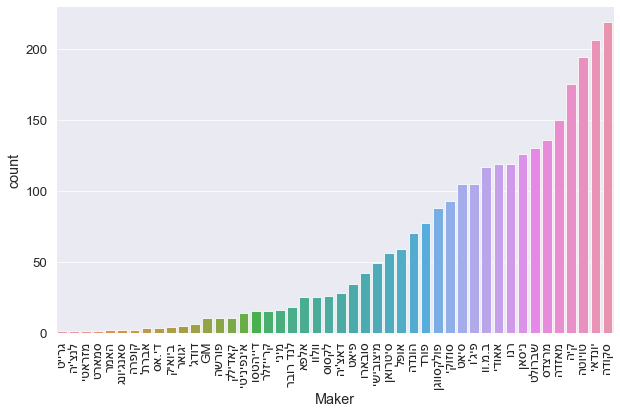

In [30]:
plt.figure(figsize=(10,6))
sns.set_theme()

maker_df = maker_df.dropna()
most_occurring_values = maker_df['Maker'].value_counts().head(50).index
maker_df_subset = maker_df[maker_df['Maker'].isin(most_occurring_values)]
sorted_df = maker_df_subset.iloc[maker_df_subset.groupby('Maker').Maker.transform('size').argsort(kind='mergesort')]
sns.set_context('paper', font_scale=1.5)
sns.countplot(x='Maker',data=sorted_df)
plt.xticks(rotation=90)
plt.show()


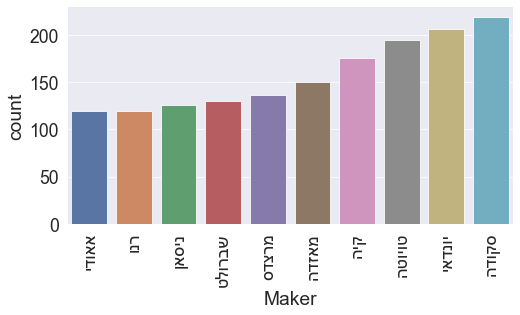

In [31]:

plt.figure(figsize=(8,4))
most_occurring_values = maker_df['Maker'].value_counts().head(10).index
sns.set_context('paper', font_scale=2)
maker_df_subset = maker_df[maker_df['Maker'].isin(most_occurring_values)]
sorted_df = maker_df_subset.iloc[maker_df_subset.groupby('Maker').Maker.transform('size').argsort(kind='mergesort')]
sns.countplot(x='Maker',data=sorted_df)
plt.xticks(rotation=90)
plt.show()


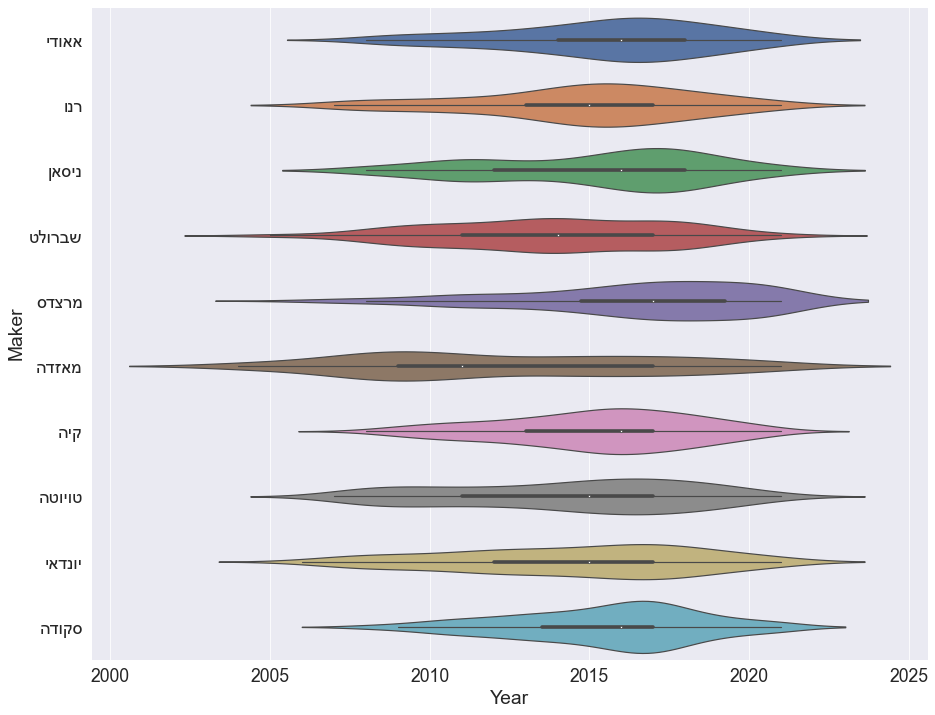

In [32]:
f, ax = plt.subplots(figsize=(15,12))
plot = sns.violinplot(data = sorted_df, x='Year', y='Maker')
sns.set_context('paper', font_scale=2)
plt.show()

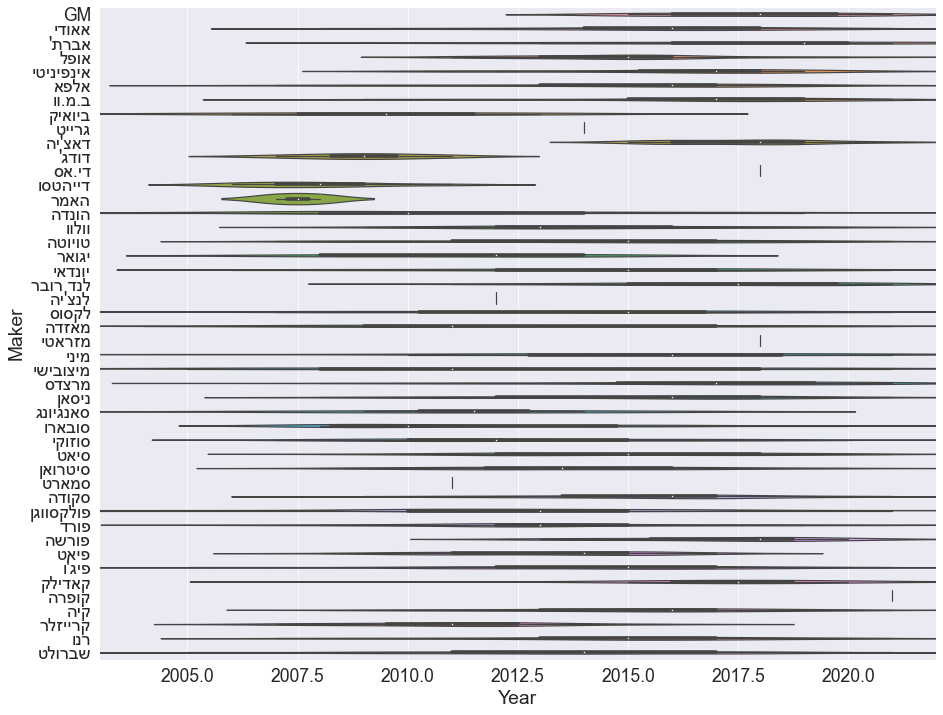

In [33]:
f, ax = plt.subplots(figsize=(15,12))
plot = sns.violinplot(y=maker_df["Maker"], x=maker_df["Year"])
sns.set_context('paper', font_scale=2)
plot.set_xlim(2003,2022)
plt.show()

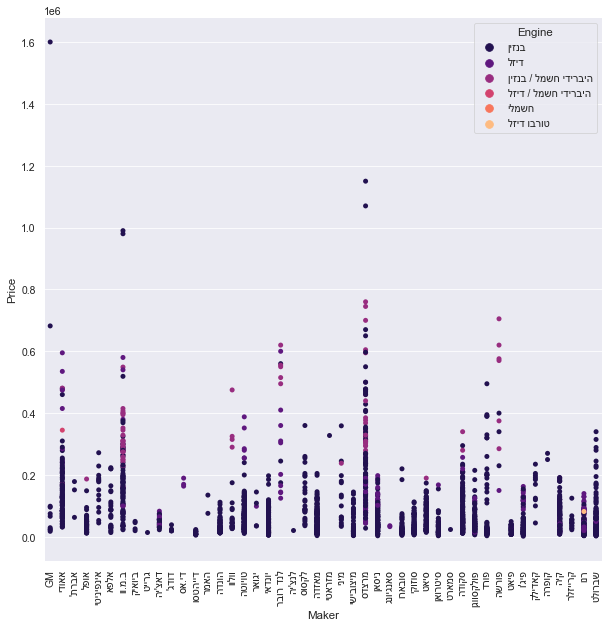

In [167]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.2)

plot = sns.stripplot(x='Maker',y='Price',data=maker_df, jitter=False, 
              hue='Engine', dodge=False, palette = 'magma')
plt.xticks(rotation=90)
plt.show()

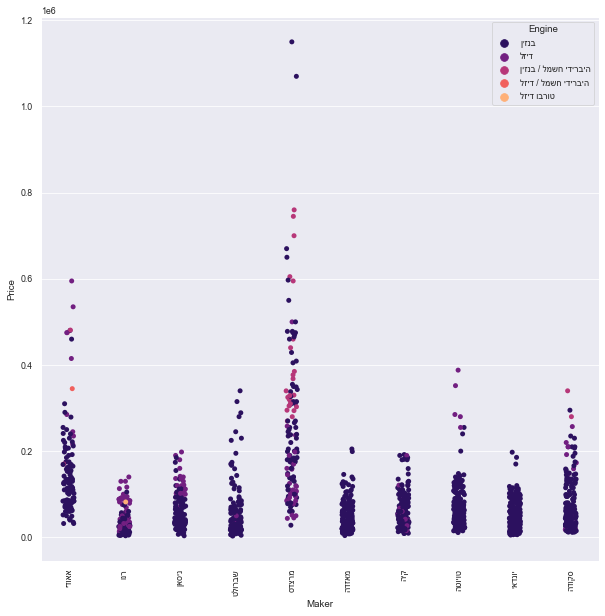

In [35]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1)

plot = sns.stripplot(x='Maker',y='Price',data=sorted_df, jitter=True, 
              hue='Engine', dodge=False, palette = 'magma')
plt.xticks(rotation=90)
plt.show()

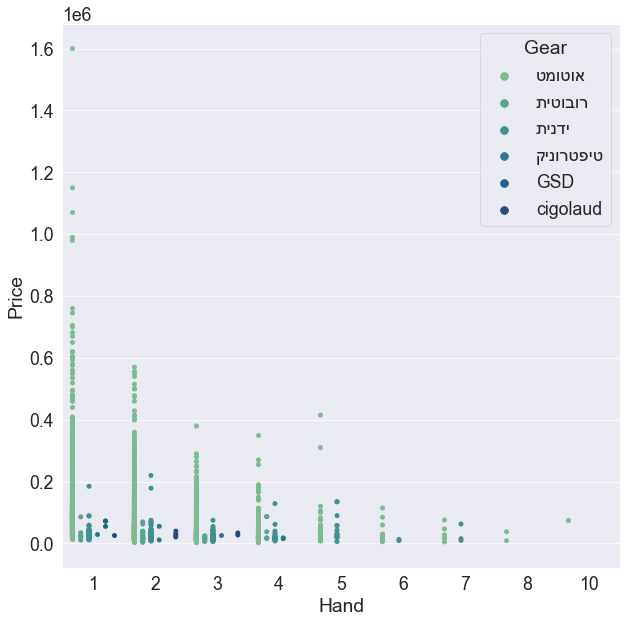

In [179]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=2)

sns.stripplot(x='Hand',y='Price',data=km_df, jitter=False, 
              hue='Gear', dodge=True, palette = 'crest')

plt.xticks(rotation=0)
plt.show()

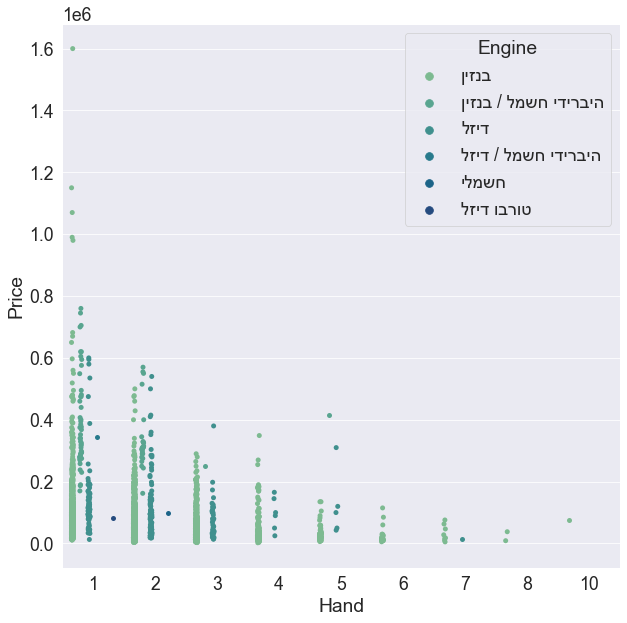

In [180]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=2)

sns.stripplot(x='Hand',y='Price',data=price_df, jitter=True, 
              hue='Engine', dodge=True, palette = 'crest')

plt.xticks()
plt.show()

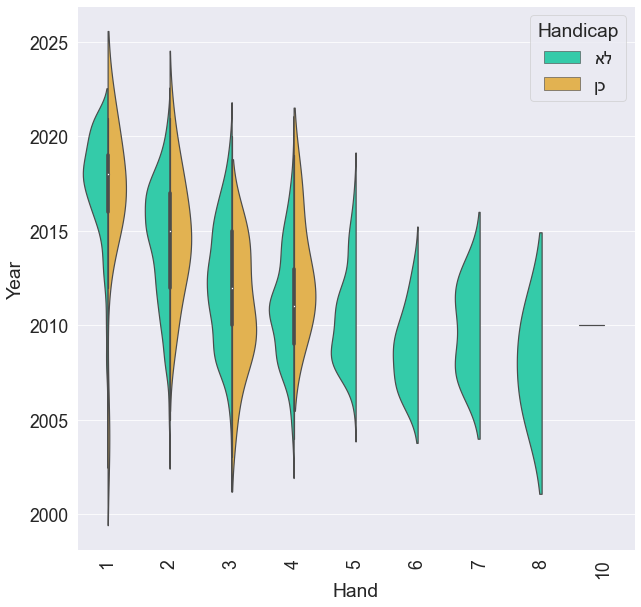

In [181]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=2)

sns.violinplot(x='Hand',y='Year',data=maker_df, 
               hue='Handicap', split = True, palette = 'turbo' )

plt.xticks(rotation=90)
plt.show()

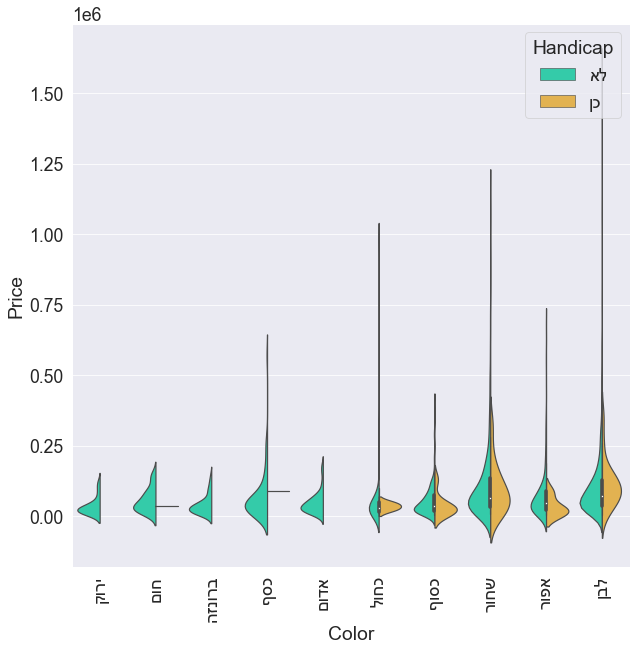

In [39]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=2)

most_occurring_values = color_df['Color'].value_counts().head(10).index
color_df_subset = color_df[color_df['Color'].isin(most_occurring_values)]
sorted_df = color_df_subset.iloc[color_df_subset.groupby('Color').Color.transform('size').argsort(kind='mergesort')]
sns.violinplot(x='Color',y='Price',data=sorted_df, 
               hue='Handicap', split = True, palette = 'turbo' )

plt.xticks(rotation=90)
plt.show()

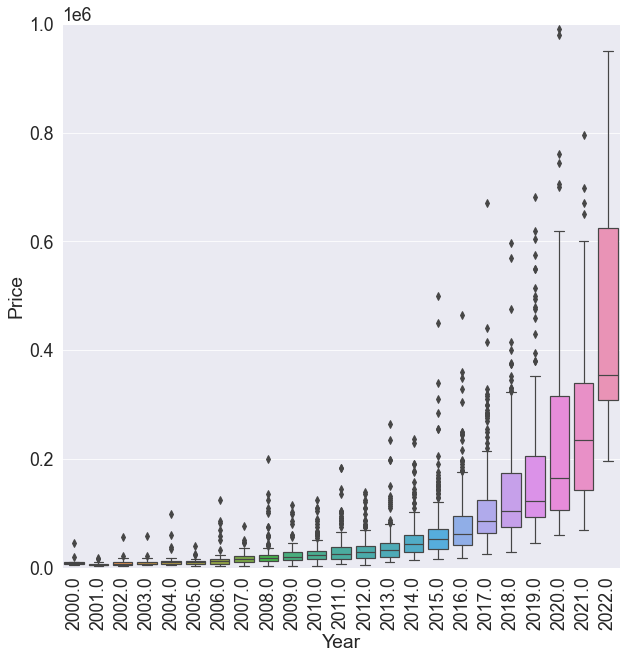

In [44]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=2)

_df = df.drop(df[df['Year'] < 2000].index)
p = sns.boxplot(x='Year', y='Price', data=_df)
plt.xticks(rotation=90)
p.set_ylim(0,1000000)

plt.show()

In [64]:
df = df.reset_index(drop=True)

<Figure size 2520x2520 with 0 Axes>

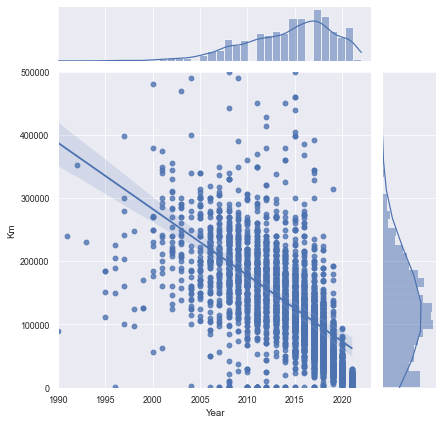

In [65]:
plt.figure(figsize=(35,35))

plot = sns.jointplot(x='Year', y='Km', data=df, kind='reg')
plot.ax_marg_x.set_xlim(1990, 2023)
plot.ax_marg_y.set_ylim(0, 500000)

plt.show()

<Figure size 720x720 with 0 Axes>

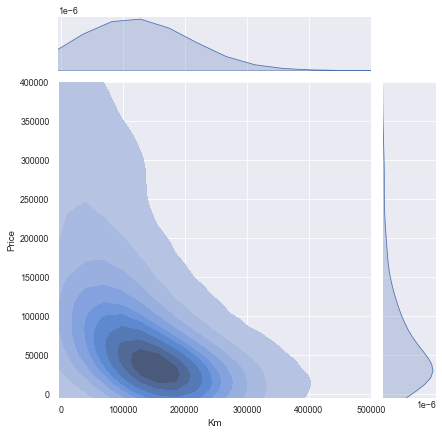

In [66]:
plt.figure(figsize=(10,10))
plot = sns.jointplot(x='Km', y='Price', data=df, kind='kde', fill = True)

plot.ax_marg_x.set_xlim(-5000, 500000)
plot.ax_marg_y.set_ylim(-5000, 400000)

plt.show()

<Figure size 720x720 with 0 Axes>

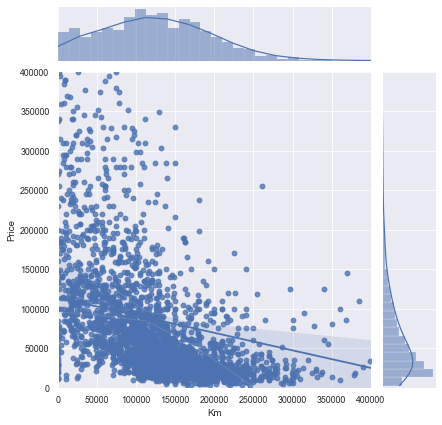

In [69]:
plt.figure(figsize=(10,10))
km_df.reset_index(drop=True, inplace=True)
sns.set_context('paper', font_scale = 1.0)
plot = sns.jointplot(x='Km', y='Price', data=km_df, kind='reg')

plot.ax_marg_x.set_xlim(0, 400000)
plot.ax_marg_y.set_ylim(0, 400000)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Ayal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

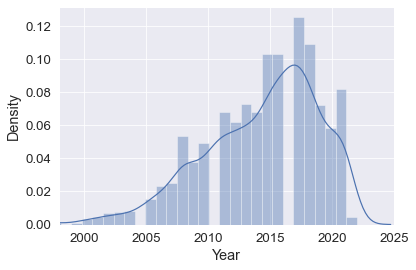

In [70]:
sns.set_context('paper', font_scale = 1.5)
plot = sns.distplot(df['Year'])
plt.xlim(1998,2025)
plot

C:\Users\Ayal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

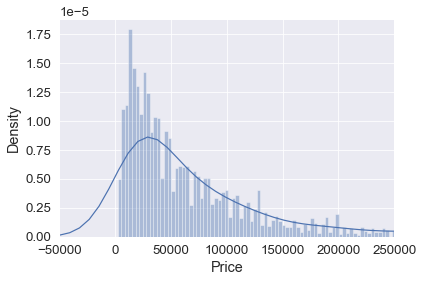

In [71]:
sns.set_context('paper', font_scale = 1.5)

plot = sns.distplot(df['Price'], bins = 500)
plt.xlim(-50000,250000)
plot

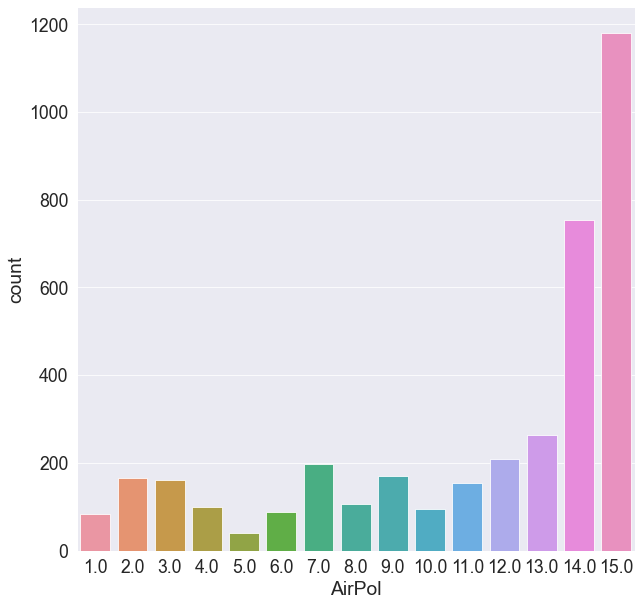

In [72]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=2)

sns.countplot(x = df['AirPol'])
plt.show()

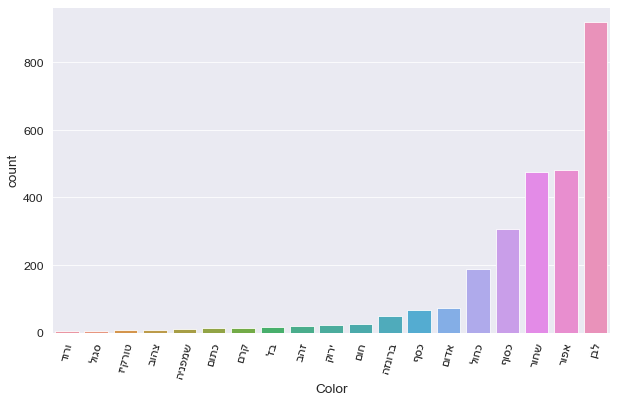

In [73]:
plt.figure(figsize=(10,6))
most_occurring_values = color_df['Color'].value_counts().head(50).index

color_df_subset = color_df[color_df['Color'].isin(most_occurring_values)]
sorted_df = color_df_subset.iloc[color_df_subset.groupby('Color').Color.transform('size').argsort(kind='mergesort')]
sns.set_context('paper', font_scale=1.4)
sns.countplot(x='Color',data=sorted_df)
plt.xticks(rotation=75)

plt.show()

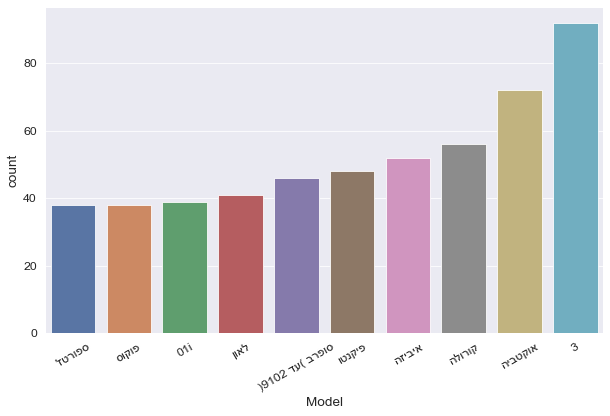

In [74]:
plt.figure(figsize=(10,6))
most_occurring_values = model_df['Model'].value_counts().head(10).index

model_df_subset = model_df[model_df['Model'].isin(most_occurring_values)]
sorted_df = model_df_subset.iloc[model_df_subset.groupby('Model').Model.transform('size').argsort(kind='mergesort')]
sns.set_context('paper', font_scale=1.4)
sns.countplot(x='Model',data=sorted_df)
plt.xticks(rotation=30)

plt.show()

<IPython.core.display.Javascript object>


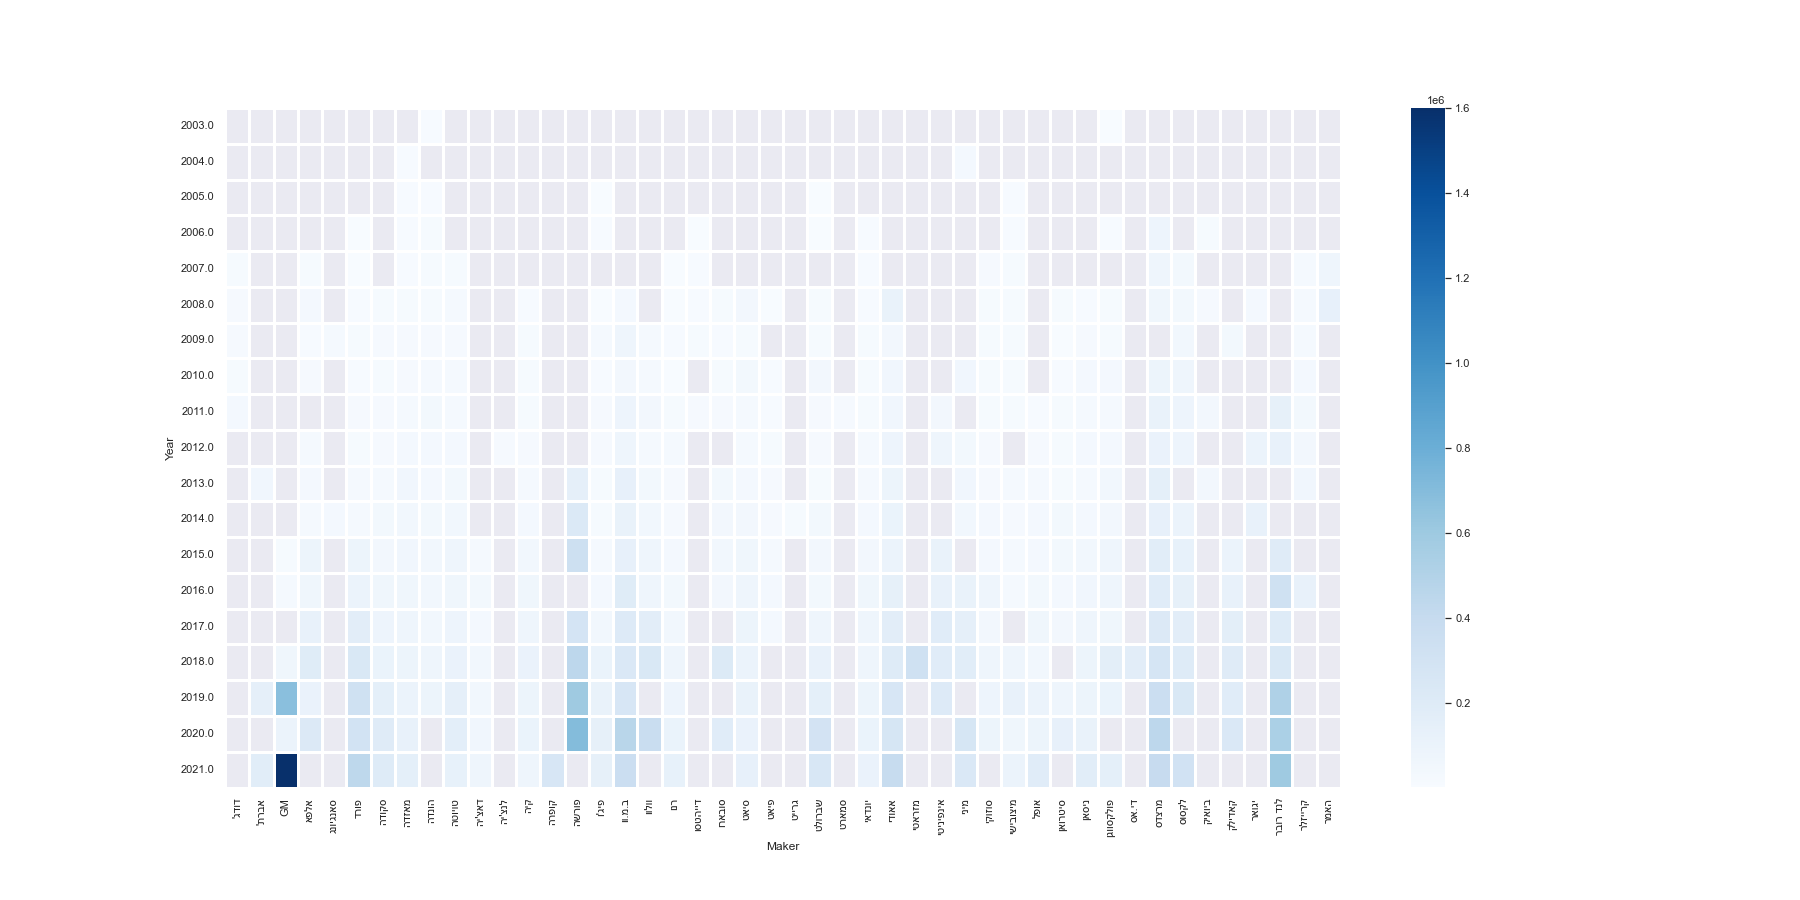

<AxesSubplot:xlabel='Maker', ylabel='Year'>

In [183]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(20,10))
sns.set_context('paper', font_scale=1)

table = maker_df.pivot_table(index='Year', columns='Maker', values='Price')
plot = sns.heatmap(table, cmap='Blues', linecolor='white', linewidth=1)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plot


<Figure size 720x720 with 0 Axes>

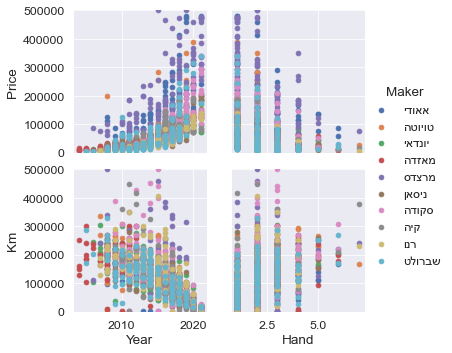

In [77]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.4)

df_g = sns.PairGrid(maker_df_subset, hue='Maker',
                      x_vars=["Year", "Hand"],
                      y_vars=["Price", "Km"])

df_g.set(ylim = (0, 500000))

df_g.map(plt.scatter)

df_g.add_legend()

<Figure size 720x720 with 0 Axes>

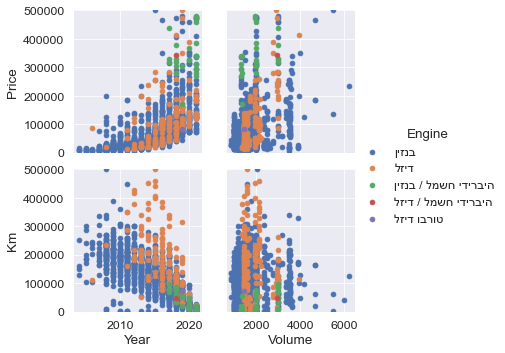

In [78]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.4)

df_g = sns.PairGrid(maker_df_subset, hue='Engine',
                      x_vars=["Year", "Volume"],
                      y_vars=["Price", "Km"])
df_g.set(ylim = (0, 500000))

df_g.map(plt.scatter)
df_g.add_legend()

<Figure size 1440x1440 with 0 Axes>

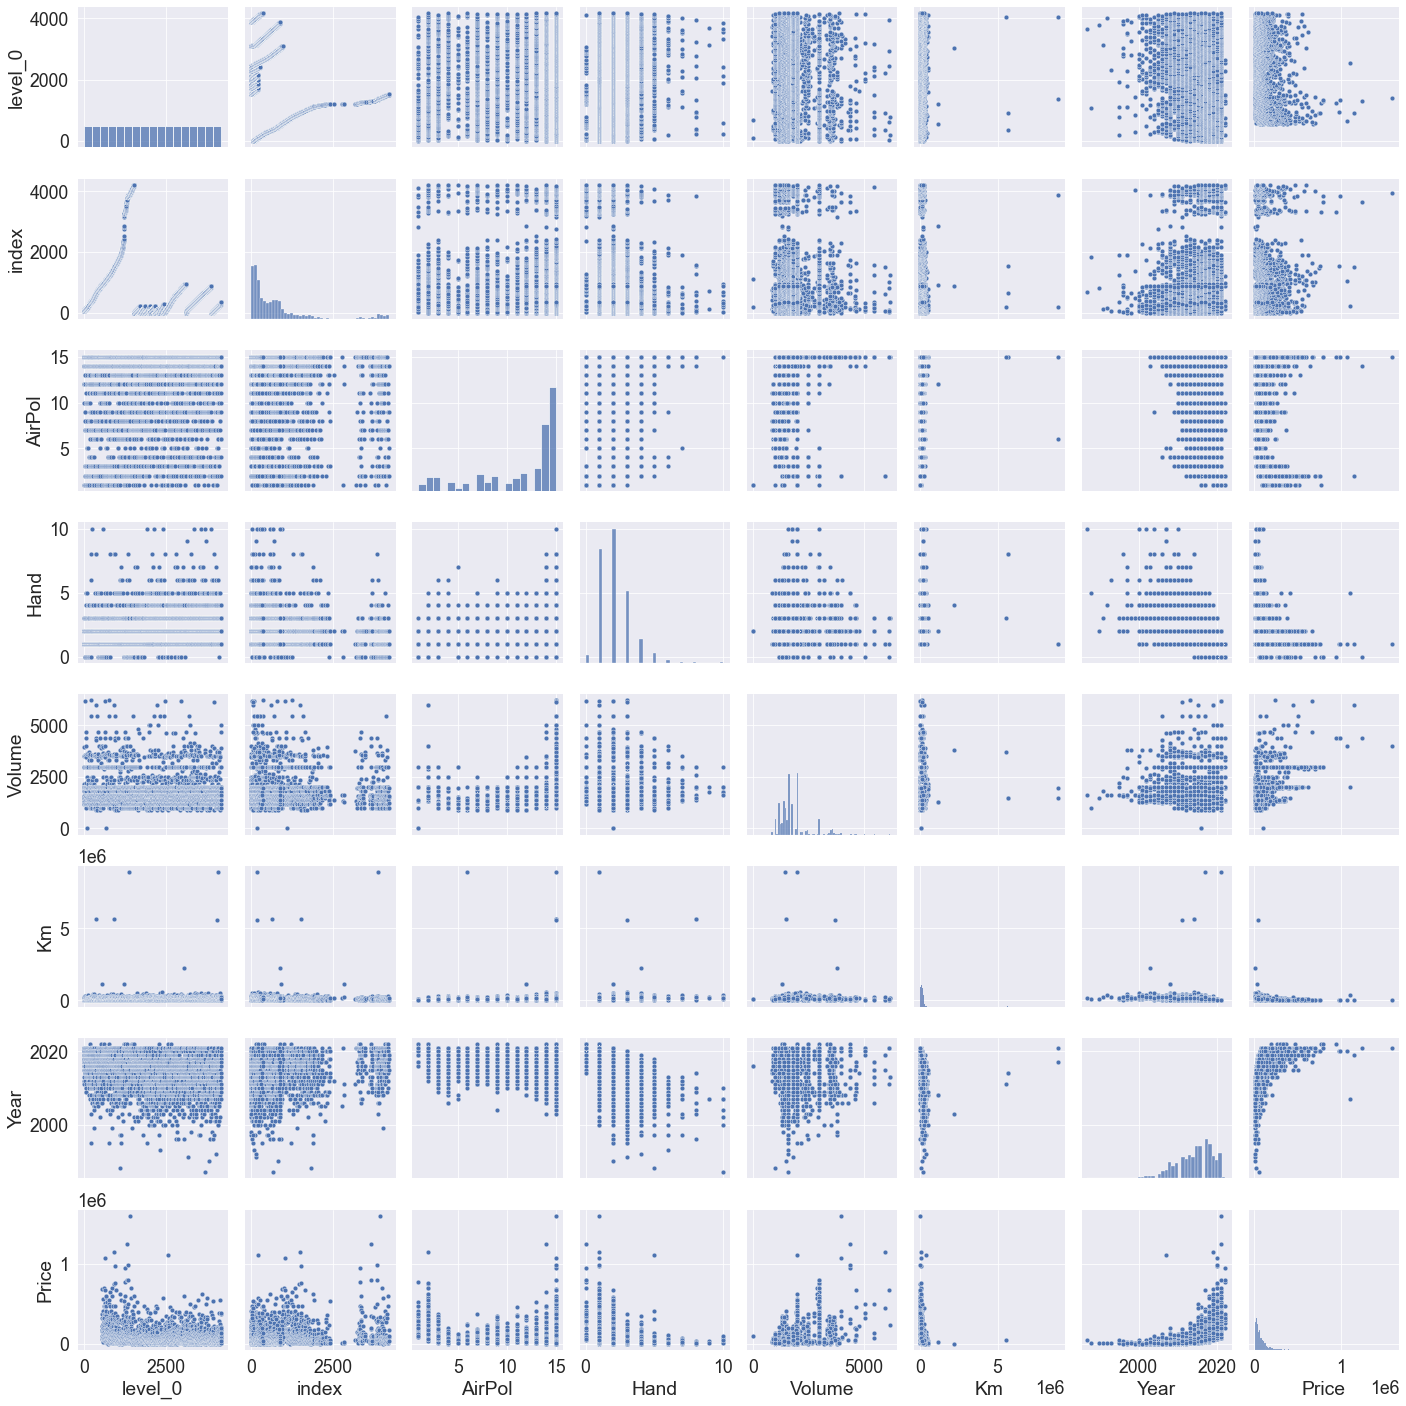

In [79]:
plt.figure(figsize=(20,20))
sns.set_context('paper', font_scale = 2.0)

plot = sns.pairplot(df)

plt.show()


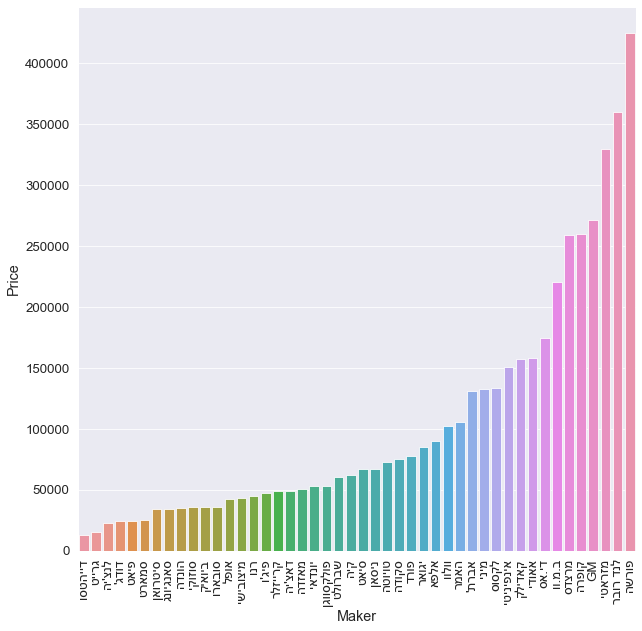

In [80]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.5)
sort_df = maker_df.groupby('Maker', as_index=False)['Price'].mean()
sorted_mean_price_df = sort_df.sort_values(by=['Price'])
sns.barplot(x='Maker', y='Price', data=sorted_mean_price_df, ci=False)

plt.xticks(rotation=90)

plt.show()

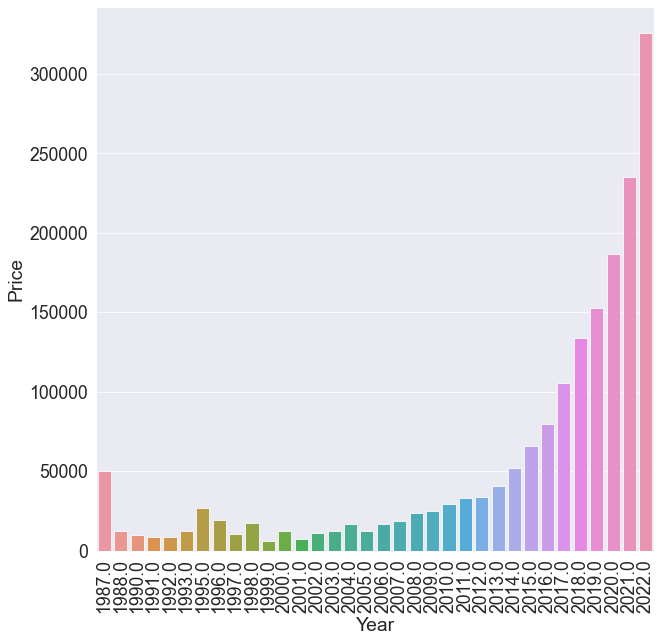

In [81]:
plt.figure(figsize=(10,10))

sns.set_context('paper', font_scale=2)
_df = df.drop(df[df['Price'] > 500000].index)
_df = _df.groupby('Year', as_index=False)['Price'].mean()
sns.barplot(x ='Year', y = 'Price', data=_df, ci=False)

plt.xticks(rotation=90)

plt.show()

In [186]:
cor_df = df
cor_df.drop(cor_df[cor_df['Price'] > 500000].index, inplace = True) 
cor_df.drop(cor_df[cor_df['Price'] < 2000].index, inplace = True) 
cor_df.drop(cor_df[cor_df['Km'] > 300000].index, inplace = True) 
cor_df.drop(cor_df[cor_df['Km'] < 100].index, inplace = True) 
corr = cor_df.corr()
corr

AirPol      Hand    Volume        Km      Year     Price
AirPol  1.000000  0.326923  0.288599  0.317871 -0.463845 -0.197430
Hand    0.326923  1.000000  0.058006  0.439833 -0.587685 -0.341877
Volume  0.288599  0.058006  1.000000  0.010389 -0.055007  0.387608
Km      0.317871  0.439833  0.010389  1.000000 -0.682011 -0.548068
Year   -0.463845 -0.587685 -0.055007 -0.682011  1.000000  0.597756
Price  -0.197430 -0.341877  0.387608 -0.548068  0.597756  1.000000

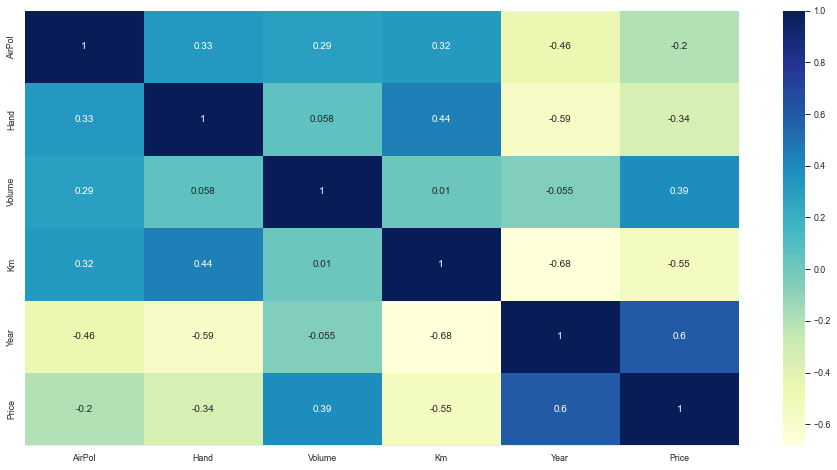

In [187]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.set_context(font_scale = 2)
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()


In [84]:
df = pd.read_csv("geocoded_csv.csv")
df = df.dropna(axis=0, subset=['latitude','longitude'])


In [85]:
fig = Figure(width=2000, height=2000)
map = folium.Map(
    location=[31.38315,36.089960],
    tiles='cartodbpositron',
    zoom_start=9,
)
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], tooltip = (row['Maker']), radius=1).add_to(map), axis=1)
fig.add_child(map)

In [86]:
fig = Figure(width=2000, height=2000)

map = folium.Map(location=[31.38315,36.089960],
                    zoom_start = 9) 
f = folium.Figure(width=900, height=900)

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
heat_df = df[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, blur = 10, radius = 15).add_to(map)

fig.add_child(map)

## ML Price Prediction


In [87]:
cars = pd.read_csv("ML_data.csv")
cars = cars.reset_index(drop=True)
cars = cars.drop(['Unnamed: 0'],axis=1)
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      4163 non-null   object 
 1   Owner     4163 non-null   object 
 2   AirPol    3763 non-null   float64
 3   Hand      4163 non-null   int64  
 4   Trade     4163 non-null   object 
 5   Handicap  4163 non-null   object 
 6   Engine    4163 non-null   object 
 7   Volume    4106 non-null   float64
 8   Color     4156 non-null   object 
 9   Km        4042 non-null   float64
 10  Year      4162 non-null   float64
 11  Gear      4163 non-null   object 
 12  Price     3107 non-null   float64
 13  Maker     4163 non-null   object 
 14  Model     4162 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 488.0+ KB
None


In [88]:
most_occurring_values = cars['Maker'].value_counts().head(30).index
cars = cars[cars['Maker'].isin(most_occurring_values)]

In [89]:
cars['Maker'].astype('category').value_counts()

סקודה        318
טויוטה       313
מרצדס        299
יונדאי       298
קיה          230
מאזדה        226
ב.מ.וו       225
אאודי        189
שברולט       184
רנו          171
ניסאן        169
פיג'ו        154
סיאט         151
פולקסווגן    133
סוזוקי       132
הונדה        107
פורד         105
סיטרואן       79
אופל          78
סובארו        74
מיצובישי      71
פיאט          49
וולוו         44
לקסוס         39
אלפא          38
דאצ'יה        37
לנד רובר      32
מיני          27
אינפיניטי     24
קרייזלר       22
Name: Maker, dtype: int64

In [90]:
cars

Area   Owner  AirPol  Hand Trade Handicap Engine  Volume  \
0          כל הארץ    חברה    12.0     1    כן       לא  בנזין  1998.0   
1            נתניה   פרטית    15.0     1    לא       לא  בנזין  1332.0   
2            רעננה   פרטית    14.0     1    כן       לא  בנזין  1499.0   
3             אזור   פרטית    14.0     1    לא       לא  בנזין  1499.0   
4            רעננה   פרטית    15.0     3    לא       לא   דיזל  2143.0   
...            ...     ...     ...   ...   ...      ...    ...     ...   
4158     קרית אונו   פרטית    13.0     3    לא       לא  בנזין  1598.0   
4159  ביר אל מכסור   פרטית     4.0     1    לא       לא  בנזין  1984.0   
4160          רמלה   פרטית    15.0     2    לא       לא  בנזין  3880.0   
4161        אשקלון  ליסינג     6.0     1    כן       לא  בנזין  1395.0   
4162           לוד   פרטית    14.0     3    לא       לא  בנזין  1399.0   

       Color        Km    Year    Gear     Price     Maker        Model  
0        לבן       NaN  2021.0  אוטומט       NaN     מאזדה            6  
1        לבן    7000.0  2020.0  אוטומט       NaN     ניסאן    אקס טרייל  
2     ברונזה    9500.0  2021.0  אוטומט       NaN  מיצובישי  אקליפס קרוס  
3        לבן   23000.0  2019.0  אוטומט       NaN    ב.מ.וו           X2  
4        לבן  179400.0  2012.0  אוטומט       NaN     מרצדס     ML Class  
...      ...       ...     ...     ...       ...       ...          ...  
4158    שחור  187000.0  2013.0   ידנית   31000.0     ניסאן        קשקאי  
4159     לבן   50000.0  2019.0  אוטומט  143000.0      סיאט         לאון  
4160    כסוף  166000.0  2009.0  אוטומט   17000.0    שברולט       אפלנדר  
4161     לבן  220000.0  2017.0  אוטומט   45000.0     סקודה        ראפיד  
4162     כסף  113000.0  2016.0  אוטומט   40000.0      אופל        אסטרה  

[4018 rows x 15 columns]

In [91]:
cars.shape
cars.isnull().sum()

Area           0
Owner          0
AirPol       382
Hand           0
Trade          0
Handicap       0
Engine         0
Volume        28
Color          7
Km           114
Year           1
Gear           0
Price       1020
Maker          0
Model          1
dtype: int64

In [92]:
cars = cars.dropna()

In [93]:
cars.isnull().sum()

Area        0
Owner       0
AirPol      0
Hand        0
Trade       0
Handicap    0
Engine      0
Volume      0
Color       0
Km          0
Year        0
Gear        0
Price       0
Maker       0
Model       0
dtype: int64

In [94]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AirPol        6.0
Hand          2.0
Volume      616.0
Km        98000.0
Year          5.0
Price     74000.0
dtype: float64


In [95]:
cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]
print(cars.shape)

(2260, 15)


C:\Users\Ayal\AppData\Local\Temp\ipykernel_26256\279068669.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]


# Models

### Random Forest

In [125]:
cars

Area   Owner  AirPol  Hand Trade Handicap Engine  Volume  \
558                אריאל   פרטית    14.0     3    לא       לא  בנזין  1991.0   
559              תימורים   פרטית    15.0     3    לא       לא  בנזין  1997.0   
563             כפר תבור   פרטית    15.0     3    לא       לא  בנזין  1999.0   
565                נתניה    חברה    15.0     2    לא       לא  בנזין  1591.0   
569           זכרון יעקב   פרטית    14.0     3    לא       לא  בנזין  1197.0   
...                  ...     ...     ...   ...   ...      ...    ...     ...   
4157  מודיעין מכבים רעות   פרטית    14.0     2    לא       לא  בנזין  1595.0   
4158           קרית אונו   פרטית    13.0     3    לא       לא  בנזין  1598.0   
4159        ביר אל מכסור   פרטית     4.0     1    לא       לא  בנזין  1984.0   
4161              אשקלון  ליסינג     6.0     1    כן       לא  בנזין  1395.0   
4162                 לוד   פרטית    14.0     3    לא       לא  בנזין  1399.0   

     Color        Km    Year    Gear     Price     Maker  \
558    לבן     117.0  2015.0  אוטומט  160000.0     מרצדס   
559    לבן   48000.0  2017.0  אוטומט  180000.0    ב.מ.וו   
563    לבן  100000.0  2015.0  אוטומט  175000.0  לנד רובר   
565   שחור  150330.0  2015.0  אוטומט   59000.0       קיה   
569    חום   88000.0  2015.0  אוטומט   64000.0     ניסאן   
...    ...       ...     ...     ...       ...       ...   
4157   לבן   45000.0  2019.0  אוטומט  205000.0     מרצדס   
4158  שחור  187000.0  2013.0   ידנית   31000.0     ניסאן   
4159   לבן   50000.0  2019.0  אוטומט  143000.0      סיאט   
4161   לבן  220000.0  2017.0  אוטומט   45000.0     סקודה   
4162   כסף  113000.0  2016.0  אוטומט   40000.0      אופל   

                       Model  
558                      CLA  
559                       X3  
563   רובר ריינג' רובר איווק  
565                  ספורטז'  
569                    קשקאי  
...                      ...  
4157                     GLA  
4158                   קשקאי  
4159                    לאון  
4161                   ראפיד  
4162                   אסטרה  

[2260 rows x 15 columns]

In [126]:
X = cars.drop(['Price', 'Area', 'Owner', 'Trade', 'Handicap'],axis=1)
y = cars['Price']


In [127]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


Engine Color    Gear     Maker                   Model
558  בנזין   לבן  אוטומט     מרצדס                     CLA
559  בנזין   לבן  אוטומט    ב.מ.וו                      X3
563  בנזין   לבן  אוטומט  לנד רובר  רובר ריינג' רובר איווק
565  בנזין  שחור  אוטומט       קיה                 ספורטז'
569  בנזין   חום  אוטומט     ניסאן                   קשקאי

In [128]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=False)
cars_dummies

Engine_בנזין  Engine_דיזל  Engine_היברידי חשמל / בנזין  \
558              1            0                            0   
559              1            0                            0   
563              1            0                            0   
565              1            0                            0   
569              1            0                            0   
...            ...          ...                          ...   
4157             1            0                            0   
4158             1            0                            0   
4159             1            0                            0   
4161             1            0                            0   
4162             1            0                            0   

      Engine_טורבו דיזל  Color_אדום  Color_אפור  Color_בז'  Color_ברונזה  \
558                   0           0           0          0             0   
559                   0           0           0          0             0   
563                   0           0           0          0             0   
565                   0           0           0          0             0   
569                   0           0           0          0             0   
...                 ...         ...         ...        ...           ...   
4157                  0           0           0          0             0   
4158                  0           0           0          0             0   
4159                  0           0           0          0             0   
4161                  0           0           0          0             0   
4162                  0           0           0          0             0   

      Color_ורוד  Color_זהב  ...  Model_ראפיד ספייסבק  \
558            0          0  ...                    0   
559            0          0  ...                    0   
563            0          0  ...                    0   
565            0          0  ...                    0   
569            0          0  ...                    0   
...          ...        ...  ...                  ...   
4157           0          0  ...                    0   
4158           0          0  ...                    0   
4159           0          0  ...                    0   
4161           0          0  ...                    0   
4162           0          0  ...                    0   

      Model_רובר דיסקברי ספורט  Model_רובר ריינג' רובר איווק  \
558                          0                             0   
559                          0                             0   
563                          0                             1   
565                          0                             0   
569                          0                             0   
...                        ...                           ...   
4157                         0                             0   
4158                         0                             0   
4159                         0                             0   
4161                         0                             0   
4162                         0                             0   

      Model_רומיאו 159  Model_רומיאו ג'וליה  Model_רומיאו ג'ולייטה  \
558                  0                    0                      0   
559                  0                    0                      0   
563                  0                    0                      0   
565                  0                    0                      0   
569                  0                    0                      0   
...                ...                  ...                    ...   
4157                 0                    0                      0   
4158                 0                    0                      0   
4159                 0                    0                      0   
4161                 0                    0                      0   
4162                 0                    0                      0   

      Model_רומיאו מיטו / MIT

In [129]:
X = X.drop(list(cars_categorical.columns), axis=1)
X = pd.concat([X, cars_dummies], axis=1)
xcols = X.columns
X = pd.DataFrame(scale(X))
X.columns = xcols
X

AirPol      Hand    Volume        Km      Year  Engine_בנזין  \
0     0.630767  0.807349  1.278585 -1.940176  0.202984      0.272295   
1     0.885145  0.807349  1.296589 -1.211181  0.759713      0.272295   
2     0.885145  0.807349  1.302590 -0.419506  0.202984      0.272295   
3     0.885145 -0.181599  0.078342  0.346743  0.202984      0.272295   
4     0.630767  0.807349 -1.103897 -0.602200  0.202984      0.272295   
...        ...       ...       ...       ...       ...           ...   
2255  0.630767 -0.181599  0.090345 -1.256854  1.316442      0.272295   
2256  0.376389  0.807349  0.099347  0.905026 -0.353745      0.272295   
2257 -1.913012 -1.170547  1.257581 -1.180732  1.316442      0.272295   
2258 -1.404256 -1.170547 -0.509777  1.407435  0.759713      0.272295   
2259  0.630767  0.807349 -0.497774 -0.221588  0.481349      0.272295   

      Engine_דיזל  Engine_היברידי חשמל / בנזין  Engine_טורבו דיזל  Color_אדום  \
0       -0.267578                    -0.042108           -0.02104   -0.177461   
1       -0.267578                    -0.042108           -0.02104   -0.177461   
2       -0.267578                    -0.042108           -0.02104   -0.177461   
3       -0.267578                    -0.042108           -0.02104   -0.177461   
4       -0.267578                    -0.042108           -0.02104   -0.177461   
...           ...                          ...                ...         ...   
2255    -0.267578                    -0.042108           -0.02104   -0.177461   
2256    -0.267578                    -0.042108           -0.02104   -0.177461   
2257    -0.267578                    -0.042108           -0.02104   -0.177461   
2258    -0.267578                    -0.042108           -0.02104   -0.177461   
2259    -0.267578                    -0.042108           -0.02104   -0.177461   

      ...  Model_ראפיד ספייסבק  Model_רובר דיסקברי ספורט  \
0     ...             -0.02104                 -0.036458   
1     ...             -0.02104                 -0.036458   
2     ...             -0.02104                 -0.036458   
3     ...             -0.02104                 -0.036458   
4     ...             -0.02104                 -0.036458   
...   ...                  ...                       ...   
2255  ...             -0.02104                 -0.036458   
2256  ...             -0.02104                 -0.036458   
2257  ...             -0.02104                 -0.036458   
2258  ...             -0.02104                 -0.036458   
2259  ...             -0.02104                 -0.036458   

      Model_רובר ריינג' רובר איווק  Model_רומיאו 159  Model_רומיאו ג'וליה  \
0                        -0.021040         -0.029761            -0.036458   
1                        -0.021040         -0.029761            -0.036458   
2                        47.528939         -0.029761            -0.036458   
3                        -0.021040         -0.029761            -0.036458   
4                        -0.021040         -0.029761            -0.036458   
...                            ...               ...                  ...   
2255                     -0.021040         -0.029761            -0.036458   
2256                     -0.021040         -0.029761            -0.036458   
2257                     -0.021040         -0.029761            -0.036458   
2258                     -0.021040         -0.029761            -0.036458   
2259                     -0.021040         -0.029761            -0.036458   

      Model_רומיאו ג'ולייטה  Model_רומיאו מיטו / MITO  Model_רומסטר  \
0                 -0.069936                 -0.042108      -0.05574   
1                 -0.069936                 -0.042108      -0.05574   
2                 -0.069936                 -0.042108      -0.05574   
3                 -0.069936                 -0.042108      -0.05574   
4                 -0.069936                 -0.042108      -0.05574   
...                     ...                       ...           ...   
2255              -0.069936

In [130]:
y

558     160000.0
559     180000.0
563     175000.0
565      59000.0
569      64000.0
          ...   
4157    205000.0
4158     31000.0
4159    143000.0
4161     45000.0
4162     40000.0
Name: Price, Length: 2260, dtype: float64

In [131]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                    train_size=0.85,
                                                    test_size = 0.15, random_state=100)

In [132]:
xtest.isnull().sum()


AirPol                      0
Hand                        0
Volume                      0
Km                          0
Year                        0
                           ..
Model_רומיאו ג'ולייטה       0
Model_רומיאו מיטו / MITO    0
Model_רומסטר                0
Model_ריו                   0
Model_שירוקו                0
Length: 323, dtype: int64

In [133]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(xtrain, ytrain);
predictions = rf.predict(xtest)

In [134]:
metrics.r2_score(ytest, predictions)

0.8743543830510412

In [135]:
np.mean(ytest-predictions)

2170.827164489395

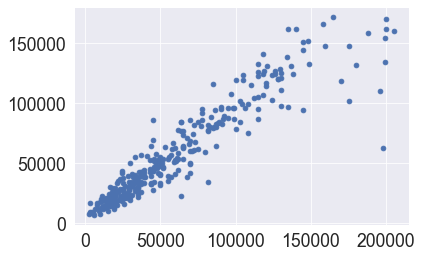

In [136]:
plt.scatter(ytest,predictions)

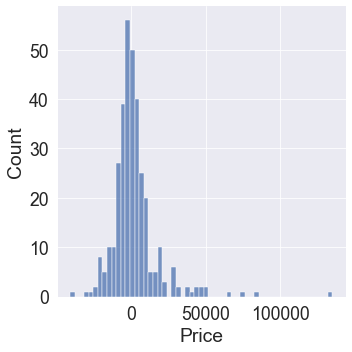

In [137]:
sns.displot(ytest-predictions)

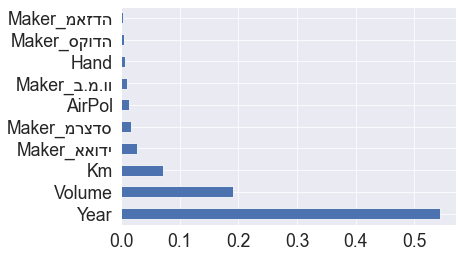

In [138]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Linear Reg

In [140]:
cars

Area   Owner  AirPol  Hand Trade Handicap Engine  Volume  \
558                אריאל   פרטית    14.0     3    לא       לא  בנזין  1991.0   
559              תימורים   פרטית    15.0     3    לא       לא  בנזין  1997.0   
563             כפר תבור   פרטית    15.0     3    לא       לא  בנזין  1999.0   
565                נתניה    חברה    15.0     2    לא       לא  בנזין  1591.0   
569           זכרון יעקב   פרטית    14.0     3    לא       לא  בנזין  1197.0   
...                  ...     ...     ...   ...   ...      ...    ...     ...   
4157  מודיעין מכבים רעות   פרטית    14.0     2    לא       לא  בנזין  1595.0   
4158           קרית אונו   פרטית    13.0     3    לא       לא  בנזין  1598.0   
4159        ביר אל מכסור   פרטית     4.0     1    לא       לא  בנזין  1984.0   
4161              אשקלון  ליסינג     6.0     1    כן       לא  בנזין  1395.0   
4162                 לוד   פרטית    14.0     3    לא       לא  בנזין  1399.0   

     Color        Km    Year    Gear     Price     Maker  \
558    לבן     117.0  2015.0  אוטומט  160000.0     מרצדס   
559    לבן   48000.0  2017.0  אוטומט  180000.0    ב.מ.וו   
563    לבן  100000.0  2015.0  אוטומט  175000.0  לנד רובר   
565   שחור  150330.0  2015.0  אוטומט   59000.0       קיה   
569    חום   88000.0  2015.0  אוטומט   64000.0     ניסאן   
...    ...       ...     ...     ...       ...       ...   
4157   לבן   45000.0  2019.0  אוטומט  205000.0     מרצדס   
4158  שחור  187000.0  2013.0   ידנית   31000.0     ניסאן   
4159   לבן   50000.0  2019.0  אוטומט  143000.0      סיאט   
4161   לבן  220000.0  2017.0  אוטומט   45000.0     סקודה   
4162   כסף  113000.0  2016.0  אוטומט   40000.0      אופל   

                       Model  
558                      CLA  
559                       X3  
563   רובר ריינג' רובר איווק  
565                  ספורטז'  
569                    קשקאי  
...                      ...  
4157                     GLA  
4158                   קשקאי  
4159                    לאון  
4161                   ראפיד  
4162                   אסטרה  

[2260 rows x 15 columns]

In [141]:
cars_lr = cars.drop(['Area', 'Owner', 'Trade', 'Handicap', 'Maker', 'Model'],axis=1)
cars_lr.head()

AirPol  Hand Engine  Volume Color        Km    Year    Gear     Price
558    14.0     3  בנזין  1991.0   לבן     117.0  2015.0  אוטומט  160000.0
559    15.0     3  בנזין  1997.0   לבן   48000.0  2017.0  אוטומט  180000.0
563    15.0     3  בנזין  1999.0   לבן  100000.0  2015.0  אוטומט  175000.0
565    15.0     2  בנזין  1591.0  שחור  150330.0  2015.0  אוטומט   59000.0
569    14.0     3  בנזין  1197.0   חום   88000.0  2015.0  אוטומט   64000.0

In [142]:
cars_categorical = cars_lr.select_dtypes(include=['object'])
cars_categorical.head()

Engine Color    Gear
558  בנזין   לבן  אוטומט
559  בנזין   לבן  אוטומט
563  בנזין   לבן  אוטומט
565  בנזין  שחור  אוטומט
569  בנזין   חום  אוטומט

In [143]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=False)
cars_dummies.head()

Engine_בנזין  Engine_דיזל  Engine_היברידי חשמל / בנזין  \
558             1            0                            0   
559             1            0                            0   
563             1            0                            0   
565             1            0                            0   
569             1            0                            0   

     Engine_טורבו דיזל  Color_אדום  Color_אפור  Color_בז'  Color_ברונזה  \
558                  0           0           0          0             0   
559                  0           0           0          0             0   
563                  0           0           0          0             0   
565                  0           0           0          0             0   
569                  0           0           0          0             0   

     Color_ורוד  Color_זהב  ...  Color_צהוב  Color_קרם  Color_שחור  \
558           0          0  ...           0          0           0   
559           0          0  ...           0          0           0   
563           0          0  ...           0          0           0   
565           0          0  ...           0          0           1   
569           0          0  ...           0          0           0   

     Color_שמפניה  Gear_DSG  Gear_dualogic  Gear_אוטומט  Gear_טיפטרוניק  \
558             0         0              0            1               0   
559             0         0              0            1               0   
563             0         0              0            1               0   
565             0         0              0            1               0   
569             0         0              0            1               0   

     Gear_ידנית  Gear_רובוטית  
558           0             0  
559           0             0  
563           0             0  
565           0             0  
569           0             0  

[5 rows x 29 columns]

In [144]:
cars_lr = cars_lr.drop(list(cars_categorical.columns), axis=1)
cars_lr = pd.concat([cars_lr, cars_dummies], axis=1)
cars_lr

AirPol  Hand  Volume        Km    Year     Price  Engine_בנזין  \
558     14.0     3  1991.0     117.0  2015.0  160000.0             1   
559     15.0     3  1997.0   48000.0  2017.0  180000.0             1   
563     15.0     3  1999.0  100000.0  2015.0  175000.0             1   
565     15.0     2  1591.0  150330.0  2015.0   59000.0             1   
569     14.0     3  1197.0   88000.0  2015.0   64000.0             1   
...      ...   ...     ...       ...     ...       ...           ...   
4157    14.0     2  1595.0   45000.0  2019.0  205000.0             1   
4158    13.0     3  1598.0  187000.0  2013.0   31000.0             1   
4159     4.0     1  1984.0   50000.0  2019.0  143000.0             1   
4161     6.0     1  1395.0  220000.0  2017.0   45000.0             1   
4162    14.0     3  1399.0  113000.0  2016.0   40000.0             1   

      Engine_דיזל  Engine_היברידי חשמל / בנזין  Engine_טורבו דיזל  ...  \
558             0                            0                  0  ...   
559             0                            0                  0  ...   
563             0                            0                  0  ...   
565             0                            0                  0  ...   
569             0                            0                  0  ...   
...           ...                          ...                ...  ...   
4157            0                            0                  0  ...   
4158            0                            0                  0  ...   
4159            0                            0                  0  ...   
4161            0                            0                  0  ...   
4162            0                            0                  0  ...   

      Color_צהוב  Color_קרם  Color_שחור  Color_שמפניה  Gear_DSG  \
558            0          0           0             0         0   
559            0          0           0             0         0   
563            0          0           0             0         0   
565            0          0           1             0         0   
569            0          0           0             0         0   
...          ...        ...         ...           ...       ...   
4157           0          0           0             0         0   
4158           0          0           1             0         0   
4159           0          0           0             0         0   
4161           0          0           0             0         0   
4162           0          0           0             0         0   

      Gear_dualogic  Gear_אוטומט  Gear_טיפטרוניק  Gear_ידנית  Gear_רובוטית  
558               0            1               0           0             0  
559               0            1               0           0             0  
563               0            1               0           0             0  
565               0            1               0           0             0  
569               0            1               0           0             0  
...             ...          ...             ...         ...           ...  
4157              0            1               0           0             0  
4158              0            0               0           1             0  
4159              0            1               0           0             0  
4161              0            1               0           0             0  
4162              0            1               0           0             0  

[2260 rows x 35 columns]

In [145]:
scaler = MinMaxScaler()
num_vars = ['AirPol', 'Hand', 'Volume', 'Km', 'Year', 'Price']
cars_lr[num_vars] = scaler.fit_transform(cars_lr[num_vars])

In [146]:
cars_lr

AirPol  Hand    Volume        Km    Year     Price  Engine_בנזין  \
558   0.928571   0.4  0.587987  0.000368  0.6250  0.759326             1   
559   1.000000   0.4  0.591149  0.152378  0.7500  0.855596             1   
563   1.000000   0.4  0.592202  0.317458  0.6250  0.831528             1   
565   1.000000   0.2  0.377239  0.477236  0.6250  0.273165             1   
569   0.928571   0.4  0.169652  0.279363  0.6250  0.297232             1   
...        ...   ...       ...       ...     ...       ...           ...   
4157  0.928571   0.2  0.379347  0.142854  0.8750  0.975933             1   
4158  0.857143   0.4  0.380927  0.593650  0.5000  0.138387             1   
4159  0.214286   0.0  0.584299  0.158727  0.8750  0.677497             1   
4161  0.357143   0.0  0.273973  0.698412  0.7500  0.205776             1   
4162  0.928571   0.4  0.276080  0.358728  0.6875  0.181709             1   

      Engine_דיזל  Engine_היברידי חשמל / בנזין  Engine_טורבו דיזל  ...  \
558             0                            0                  0  ...   
559             0                            0                  0  ...   
563             0                            0                  0  ...   
565             0                            0                  0  ...   
569             0                            0                  0  ...   
...           ...                          ...                ...  ...   
4157            0                            0                  0  ...   
4158            0                            0                  0  ...   
4159            0                            0                  0  ...   
4161            0                            0                  0  ...   
4162            0                            0                  0  ...   

      Color_צהוב  Color_קרם  Color_שחור  Color_שמפניה  Gear_DSG  \
558            0          0           0             0         0   
559            0          0           0             0         0   
563            0          0           0             0         0   
565            0          0           1             0         0   
569            0          0           0             0         0   
...          ...        ...         ...           ...       ...   
4157           0          0           0             0         0   
4158           0          0           1             0         0   
4159           0          0           0             0         0   
4161           0          0           0             0         0   
4162           0          0           0             0         0   

      Gear_dualogic  Gear_אוטומט  Gear_טיפטרוניק  Gear_ידנית  Gear_רובוטית  
558               0            1               0           0             0  
559               0            1               0           0             0  
563               0            1               0           0             0  
565               0            1               0           0             0  
569               0            1               0           0             0  
...             ...          ...             ...         ...           ...  
4157              0            1               0           0             0  
4158              0            0               0           1             0  
4159              0            1               0           0             0  
4161              0            1               0           0             0  
4162              0            1               0           0             0  

[2260 rows x 35 columns]

In [147]:
y = cars_lr.pop('Price')
X = cars_lr
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                    train_size=0.9,
                                                    test_size = 0.1, random_state=100)

In [148]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
predictions = lr.predict(xtest)

In [149]:
metrics.r2_score(ytest, predictions)

0.7582598325415093

In [150]:
np.mean(ytest-predictions)

-0.005474846633627241

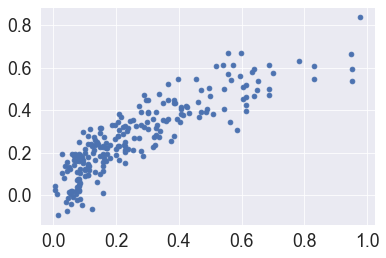

In [151]:
plt.scatter(ytest,predictions)

C:\Users\Ayal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

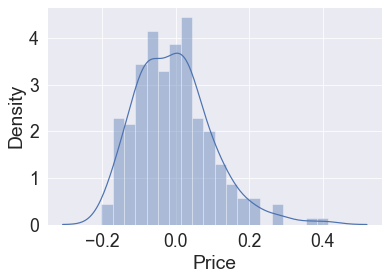

In [156]:
sns.distplot(ytest-predictions, bins=20)
